In [2]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.api as smm
from sklearn import linear_model
from scipy import stats
from statsmodels.api import add_constant
from pandas.core import datetools
%matplotlib inline

C:\Users\Yiheng\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
month = {'JAN': 1, 'FEB':2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6, 'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT':10, 'NOV': 11, 'DEC': 12}

In [4]:
# Import high frequency data

path =r'D:\data_raw' # Please put all .csv documents into one folder
company_list = ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'DWDP', 'GE', 'GS', \
                           'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', \
                            'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WMT', 'XOM' ] # Input company name as a list
company_data = {} # Store company data as a dictionary: {company_name1: data1, company_name2: data2, ...}
for company in company_list:
    frame = pd.DataFrame()
    list_ = []
    allFiles = glob.glob(path + '/' +company +'_' + '*.csv')
    allFiles.reverse()
    #print (allFiles)
    for file_ in allFiles:
        df = pd.read_csv(file_, index_col=None, header=0, usecols=[0,1], skiprows=[1,])
        list_.append(df)
    frame = pd.concat(list_)
    company_data[company] = frame
    company_data[company].index = pd.RangeIndex(len(company_data[company].index))

In [5]:
high_mom_daily_data = {}
list_big_data = []
for com in company_list:
    list_temp = []
    date_idx = []
    high_mom_daily_data[com] = pd.DataFrame(columns = [com+'_RDVar', com+'_RDSkew', com+'_RDKurt'])
    date_idx_s = np.array(company_data[com].loc[pd.isnull(company_data[com].Close), ].index)
    date_idx_e = np.append(date_idx_s[1:], company_data[com].shape[0])
    for i, j in zip(date_idx_s, date_idx_e):
        date = company_data[com]['Time Interval'][i][:9]
        d = date[:2]
        m = str(month[date[2:5]])
        y = date[5:]
        date_idx.append(d+'/'+m+'/'+y)
        log_r = np.log(company_data[com].Close[i+1: j]).diff().dropna()
        RDVar = np.sum(np.square(log_r))
        RDSkew = np.sqrt(len(log_r)) * np.sum(log_r**3) / RDVar**1.5
        RDKurt = len(log_r) * np.sum(log_r**4) / RDVar**2
        list_temp.append({com+'_RDVar': RDVar, com+'_RDSkew': RDSkew, com+'_RDKurt': RDKurt})
    high_mom_daily_data[com] = high_mom_daily_data[com].append(list_temp)
    high_mom_daily_data[com].index = pd.to_datetime(date_idx, dayfirst=True)
    list_big_data.append(high_mom_daily_data[com])

In [6]:
# drop na rows
big_data = pd.concat(list_big_data, axis = 1)
big_data.dropna(axis = 0, how = 'any', inplace = True)

In [7]:
big_data.head()

,AAPL_RDVar,AAPL_RDSkew,AAPL_RDKurt,AXP_RDVar,AXP_RDSkew,AXP_RDKurt,BA_RDVar,BA_RDSkew,BA_RDKurt,CAT_RDVar,...,V_RDKurt,VZ_RDVar,VZ_RDSkew,VZ_RDKurt,WMT_RDVar,WMT_RDSkew,WMT_RDKurt,XOM_RDVar,XOM_RDSkew,XOM_RDKurt
2013-03-05,0.000313,1.081875,5.067554,0.000092,1.473411,5.242531,0.000097,1.065091,5.099108,0.000091,...,6.253578,0.000101,2.295329,16.063942,0.000066,1.127549,6.297080,0.000039,-0.157674,3.643556
2013-03-06,0.000183,-1.554877,7.822650,0.000037,0.140918,2.654607,0.000058,-0.169225,4.964183,0.000056,...,5.331238,0.000081,-1.658678,9.732753,0.000060,-0.719230,5.040375,0.000091,0.341401,4.675125
2013-03-07,0.000185,0.452306,2.270900,0.000042,-1.072282,5.143712,0.000184,0.759341,6.925765,0.000049,...,31.120697,0.000029,-0.477829,6.762715,0.000029,-0.189093,3.974631,0.000029,-0.629338,3.498641
2013-03-08,0.000202,2.288736,13.387587,0.000081,-0.034387,2.803615,0.000065,-0.554451,3.060896,0.000047,...,2.896540,0.000033,0.197740,3.337107,0.000040,-1.598066,9.182628,0.000039,-0.032399,2.691042
2013-03-11,0.000219,2.714745,11.018396,0.000034,0.503458,2.678779,0.000100,1.360389,7.033508,0.000057,...,8.041749,0.000044,-0.652570,3.832367,0.000023,-0.602728,3.329356,0.000042,-0.155409,6.897764


In [8]:
# renew high_mom_daily_data
for com in company_list:
    index = company_list.index(com)
    high_mom_daily_data[com] = big_data.loc[:, [com+'_RDVar', com+'_RDSkew', com+'_RDKurt']]

In [9]:
high_mom_daily_data['AAPL'].head()

,AAPL_RDVar,AAPL_RDSkew,AAPL_RDKurt
2013-03-05,0.000313,1.081875,5.067554
2013-03-06,0.000183,-1.554877,7.822650
2013-03-07,0.000185,0.452306,2.270900
2013-03-08,0.000202,2.288736,13.387587
2013-03-11,0.000219,2.714745,11.018396


In [10]:
# Import daily data

company_daily = {}
list_daily = []
for com in company_list:
    company_daily[com] = pd.read_excel('D:\\daily_data_xls\\'+com+'_daily.xlsx', index_col = 0, header = 0)
    list_drop = list(company_daily[com].columns.values[:-1])
    company_daily[com].drop(list_drop, axis = 1, inplace = True)
    list_daily.append(company_daily[com])
    
big_data_daily = pd.concat(list_daily, axis = 1)
big_data_daily.dropna(axis = 0, how = 'any', inplace = True)

In [11]:
# drop na rows
super_big_data = pd.concat([big_data, big_data_daily], axis = 1)
super_big_data.dropna(axis = 0, how = 'any', inplace = True)

In [12]:
super_big_data.shape

(1255, 120)

In [13]:
# renew high_mom_daily_data and company_daily again
company_daily = {}
high_mom_daily_data = {}
for com in company_list:
    index = company_list.index(com)
    high_mom_daily_data[com] = super_big_data.loc[:, [com+'_RDVar', com+'_RDSkew', com+'_RDKurt']]
    company_daily[com] = pd.DataFrame(super_big_data.loc[:, [com+'.Adjusted']])
    company_daily[com]['Daily_logp'] = np.log(company_daily[com].iloc[:, 0])
    company_daily[com]['Daily_logr'] = company_daily[com]['Daily_logp'].diff()

In [14]:
for com in company_list:
    super_big_data[com+'_logr'] = company_daily[com].Daily_logr

In [15]:
super_big_data.to_csv('D:\\super_big_data.csv')

In [16]:
company_daily['AAPL'].shape

(1255, 3)

In [17]:
# Combine two dataframes
for com in company_list:
    high_mom_daily_data[com][com+'_DR'] = company_daily[com].Daily_logr

In [18]:
# Save data
for com in company_list:
    high_mom_daily_data[com].to_csv('D:\\output_data\\'+com+'.csv')

In [19]:
# daily close price by company matrix
price_com_mat = pd.DataFrame(columns = company_list)
for com in company_list:
    price_com_mat[com] = company_daily[com].iloc[:,0]

In [20]:
price_com_mat.to_csv('D:\\price_com_mat.csv')

In [21]:
high_mom_daily_data['AXP']['AXP'+'_RDSkew'].head()

2013-03-05    1.473411
2013-03-06    0.140918
2013-03-07   -1.072282
2013-03-08   -0.034387
2013-03-11    0.503458
Name: AXP_RDSkew, dtype: float64

In [22]:
# Construct weekly data (5 trading days a week)
weekly_data = {}
for com in company_list:
    weekly_data[com] = pd.DataFrame()
    weekly_data[com]['WR'] = high_mom_daily_data[com][com+'_DR'].rolling(5).sum()[4::5]
    weekly_data[com]['RVol'] = np.sqrt(252.*high_mom_daily_data[com][com+'_RDVar'].rolling(5).mean()[4::5])
    weekly_data[com]['RSkew'] = high_mom_daily_data[com][com+'_RDSkew'].rolling(5).mean()[4::5]
    weekly_data[com]['RKurt'] = high_mom_daily_data[com][com+'_RDKurt'].rolling(5).mean()[4::5]

In [23]:
# Construct monthly data (20 trading days a month)
monthly_data = {}
for com in company_list:
    monthly_data[com] = pd.DataFrame()
    monthly_data[com]['MR'] = high_mom_daily_data[com][com+'_DR'].rolling(20).sum()[19::20]
    monthly_data[com]['RVol'] = np.sqrt(252.*high_mom_daily_data[com][com+'_RDVar'].rolling(20).mean()[19::20])
    monthly_data[com]['RSkew'] = high_mom_daily_data[com][com+'_RDSkew'].rolling(20).mean()[19::20]
    monthly_data[com]['RKurt'] = high_mom_daily_data[com][com+'_RDKurt'].rolling(20).mean()[19::20]

In [25]:
monthly_data['AXP'].head()

,MR,RVol,RSkew,RKurt
2013-04-02,NaN,0.121809,0.238017,4.325682
2013-04-30,0.014281,0.153605,-0.196540,6.149614
2013-05-29,0.102975,0.149283,0.243209,5.217550
2013-06-26,-0.025781,0.193713,-0.119275,4.003757
2013-07-25,0.028035,0.166062,0.294306,5.274929


In [26]:
weekly_data['AXP'].shape

(251, 4)

In [27]:
# Split weekly data into train and test data
weekly_test_data = {}
for com in weekly_data.keys():
    weekly_test_data[com] = weekly_data[com][-50: ]
    weekly_data[com] = weekly_data[com][:-50]

In [28]:
# Split monthly data into train and test data
monthly_test_data = {}
for com in company_list:
    monthly_test_data[com] = monthly_data[com][-12: ]
    monthly_data[com] = monthly_data[com][:-12]

In [29]:
total_month = monthly_data['AAPL'].shape[0]

In [30]:
total_month

50

In [31]:
total_week = weekly_data['AAPL'].shape[0]

In [32]:
total_week

201

In [33]:
# Cross sectional regression on weekly data
company_beta_pval = pd.DataFrame(columns = ['vol_intercept', 'b_vol', 'vol_p_val','vol_R2',\
                                            'skew_intercept', 'b_skew','skew_p_val','skew_R2',\
                                            'kurt_intercept','b_kurt', 'kurt_p_val','kurt_R2'])
company_all_beta_pval=pd.DataFrame(columns = ['intercept', 'b_vol', 'vol_p_val', 'b_skew', 'skew_p_val','b_kurt', 'kurt_p_val','adj_R2'])
#company_all_beta_pval=pd.DataFrame(columns = ['intercept', 'b_vol', 'vol_p_val', 'b_skew', 'skew_p_val','adj_R2'])#,'b_kurt', 'kurt_p_val'

list_cbp_weekly = []
list_all_weekly=[]
for i in range(200):
    next_return =[]
    cur_vol = []
    cur_skew = []
    cur_kurt = []
    cur_all=[]
    for com in company_list:
        date_index = weekly_data[com].index
        next_return.append(weekly_data[com].WR[date_index[i+1]])
        cur_vol.append(weekly_data[com].RVol[date_index[i]])
        cur_skew.append(weekly_data[com].RSkew[date_index[i]])
        cur_kurt.append(weekly_data[com].RKurt[date_index[i]])
    cur_all=np.column_stack((cur_vol,cur_skew,cur_kurt))
    #cur_all=np.column_stack((cur_vol,cur_skew))
    cur_vol = add_constant(cur_vol)
    cur_skew = add_constant(cur_skew)
    cur_kurt = add_constant(cur_kurt)
    cur_all=add_constant(cur_all)
    lm_vol = sm.OLS(next_return, cur_vol).fit()
    lm_skew = sm.OLS(next_return, cur_skew).fit()
    lm_kurt = sm.OLS(next_return, cur_kurt).fit()
    lm_all=smm.OLS(next_return,cur_all).fit()
    list_cbp_weekly.append({'vol_intercept': lm_vol.params[0], 'b_vol': lm_vol.params[1], 'vol_p_val': lm_vol.pvalues[1],'vol_R2':lm_vol.rsquared,'skew_intercept': lm_skew.params[0], 'b_skew': lm_skew.params[1], 'skew_p_val': lm_skew.pvalues[1],'skew_R2':lm_skew.rsquared, 'kurt_intercept': lm_kurt.params[0], 'b_kurt': lm_kurt.params[1], 'kurt_p_val': lm_kurt.pvalues[1],'kurt_R2':lm_kurt.rsquared})
    list_all_weekly.append({'intercept': lm_all.params[0], 'b_vol': lm_all.params[1], 'vol_p_val': lm_all.pvalues[1],'b_skew': lm_all.params[2], 'skew_p_val': lm_all.pvalues[2],'b_kurt': lm_all.params[3], 'kurt_p_val': lm_all.pvalues[3],'adj_R2':lm_all.rsquared_adj})
    #list_all_weekly.append({'intercept': lm_all.params[0], 'b_vol': lm_all.params[1], 'vol_p_val': lm_all.pvalues[1],'b_skew': lm_all.params[2], 'skew_p_val': lm_all.pvalues[2],'adj_R2':lm_all.rsquared_adj})
company_beta_pval = company_beta_pval.append(list_cbp_weekly)
company_all_beta_pval=company_all_beta_pval.append(list_all_weekly)


In [34]:
company_beta_pval.mean()

vol_intercept     0.000855
b_vol             0.011892
vol_p_val         0.377512
vol_R2            0.062604
skew_intercept    0.002484
b_skew           -0.001397
skew_p_val        0.446688
skew_R2           0.049874
kurt_intercept    0.003865
b_kurt           -0.000266
kurt_p_val        0.457804
kurt_R2           0.040744
dtype: float64

In [35]:
company_all_beta_pval.mean()

intercept     0.001258
b_vol         0.016367
vol_p_val     0.394048
b_skew       -0.001128
skew_p_val    0.437702
b_kurt       -0.000250
kurt_p_val    0.487118
adj_R2        0.047793
dtype: float64

In [36]:
#monthly regression
monthly_beta_pval = pd.DataFrame(columns = ['vol_intercept', 'b_vol', 'vol_p_val','vol_R2',\
                                            'skew_intercept', 'b_skew','skew_p_val','skew_R2',\
                                            'kurt_intercept','b_kurt', 'kurt_p_val','kurt_R2'])
monthly_all_beta_pval=pd.DataFrame(columns = ['intercept', 'b_vol', 'vol_p_val', \
                                              'b_skew', 'skew_p_val','adj_R2'])#,'b_kurt', 'kurt_p_val'

list_cbp_monthly = []
list_all_monthly=[]
for i in range(total_month-1):
    next_return =[]
    cur_vol = []
    cur_skew = []
    cur_kurt = []
    cur_all=[]
    for com in company_list:
        date_index = monthly_data[com].index
        next_return.append(monthly_data[com].MR[date_index[i+1]])
        cur_vol.append(monthly_data[com].RVol[date_index[i]])
        cur_skew.append(monthly_data[com].RSkew[date_index[i]])
        cur_kurt.append(monthly_data[com].RKurt[date_index[i]])
    cur_all=np.column_stack((cur_vol,cur_skew,cur_kurt))#,cur_kurt))
    cur_vol = add_constant(cur_vol)
    cur_skew = add_constant(cur_skew)
    cur_kurt = add_constant(cur_kurt)
    cur_all=add_constant(cur_all)
    lm_vol = sm.OLS(next_return, cur_vol).fit()
    lm_skew = sm.OLS(next_return, cur_skew).fit()
    lm_kurt = sm.OLS(next_return, cur_kurt).fit()
    lm_all=smm.OLS(next_return,cur_all).fit()
    #print lm_all.summary()
    list_cbp_monthly.append({'vol_intercept': lm_vol.params[0], 'b_vol': lm_vol.params[1], 'vol_p_val': lm_vol.pvalues[1],'vol_R2':lm_vol.rsquared,'skew_intercept': lm_skew.params[0], 'b_skew': lm_skew.params[1], 'skew_p_val': lm_skew.pvalues[1],'skew_R2':lm_skew.rsquared, 'kurt_intercept': lm_kurt.params[0], 'b_kurt': lm_kurt.params[1], 'kurt_p_val': lm_kurt.pvalues[1],'kurt_R2':lm_kurt.rsquared})
    
    list_all_monthly.append({'intercept': lm_all.params[0], 'b_vol': lm_all.params[1], 'vol_p_val': lm_all.pvalues[1],\
                           'b_skew': lm_all.params[2], 'skew_p_val': lm_all.pvalues[2],\
                           'b_kurt': lm_all.params[3], 'kurt_p_val': lm_all.pvalues[3],'adj_R2':lm_all.rsquared_adj})
    #list_all_monthly.append({'intercept': lm_all.params[0], 'b_vol': lm_all.params[1], 'vol_p_val': lm_all.pvalues[1],'b_skew': lm_all.params[2], 'skew_p_val': lm_all.pvalues[2],'adj_R2':lm_all.rsquared_adj})  #,'b_kurt': lm_all.params[3], 'kurt_p_val': lm_all.pvalues[3]                      
    

monthly_beta_pval = monthly_beta_pval.append(list_cbp_monthly)
monthly_all_beta_pval=monthly_all_beta_pval.append(list_all_monthly)

In [37]:
monthly_all_beta_pval.mean()


adj_R2        0.047667
b_kurt        0.002434
b_skew        0.000014
b_vol         0.142732
intercept    -0.021689
kurt_p_val    0.438144
skew_p_val    0.480248
vol_p_val     0.349834
dtype: float64

In [38]:
monthly_beta_pval.mean()

vol_intercept    -0.011920
b_vol             0.158607
vol_p_val         0.317899
vol_R2            0.070748
skew_intercept    0.010803
b_skew           -0.001318
skew_p_val        0.469226
skew_R2           0.035209
kurt_intercept   -0.001543
b_kurt            0.002377
kurt_p_val        0.475146
kurt_R2           0.041129
dtype: float64

In [39]:
monthly_all_beta_pval.mean()

adj_R2        0.047667
b_kurt        0.002434
b_skew        0.000014
b_vol         0.142732
intercept    -0.021689
kurt_p_val    0.438144
skew_p_val    0.480248
vol_p_val     0.349834
dtype: float64

In [40]:
# # Cross sectional regression on monthly data
# monthly_beta_pval = pd.DataFrame(columns = ['vol_intercept', 'b_vol', 'vol_p_val', 'skew_intercept', 'b_skew', \
#                                                                                    'skew_p_val','kurt_intercept','b_kurt', 'kurt_p_val'])
# list_cbp = []
# for i in range(total_month-1):
#     next_return =[]
#     cur_vol = []
#     cur_skew = []
#     cur_kurt = []
#     for com in company_list:
#         date_index = monthly_data[com].index
#         next_return.append(monthly_data[com].MR[date_index[i+1]])
#         cur_vol.append(monthly_data[com].RVol[date_index[i]])
#         cur_skew.append(monthly_data[com].RSkew[date_index[i]])
#         cur_kurt.append(monthly_data[com].RKurt[date_index[i]])
#     cur_vol = add_constant(cur_vol)
#     cur_skew = add_constant(cur_skew)
#     cur_kurt = add_constant(cur_kurt)
#     lm_vol = sm.OLS(next_return, cur_vol).fit()
#     lm_skew = sm.OLS(next_return, cur_skew).fit()
#     lm_kurt = sm.OLS(next_return, cur_kurt).fit()
    
#     list_cbp.append({'vol_intercept': lm_vol.params[0], 'b_vol': lm_vol.params[1], 'vol_p_val': lm_vol.pvalues[1], \
#                                  'skew_intercept': lm_skew.params[0], 'b_skew': lm_skew.params[1], 'skew_p_val': lm_skew.pvalues[1],\
#                                   'kurt_intercept': lm_kurt.params[0], 'b_kurt': lm_kurt.params[1], 'kurt_p_val': lm_kurt.pvalues[1]})
# monthly_beta_pval = monthly_beta_pval.append(list_cbp)

In [42]:
# IC time series of vol, skew and kurt
weekly_IC = pd.DataFrame(columns = ['vol_Rank_IC', 'vol_pvalue','skew_Rank_IC', 'skew_pvalue', 'kurt_Rank_IC', 'kurt_pvalue'])
list_dict = []
for i in range(total_week - 1):
    next_return =[]
    cur_vol = []
    cur_skew = []
    cur_kurt = []
    for com in company_list:
        date_index = weekly_data[com].index
        next_return.append(weekly_data[com].WR[date_index[i+1]])
        cur_vol.append(weekly_data[com].RVol[date_index[i]])
        cur_skew.append(weekly_data[com].RSkew[date_index[i]])
        cur_kurt.append(weekly_data[com].RKurt[date_index[i]])
    
    vol_IC, vol_p = stats.spearmanr(cur_vol, next_return)
    skew_IC, skew_p = stats.spearmanr(cur_skew, next_return)
    kurt_IC, kurt_p = stats.spearmanr(cur_kurt, next_return)
    
    list_dict.append({'vol_Rank_IC': vol_IC, 'vol_pvalue': vol_p, 'skew_Rank_IC': skew_IC, 'skew_pvalue': skew_p, \
                              'kurt_Rank_IC': kurt_IC, 'kurt_pvalue': kurt_p}) 
weekly_IC = weekly_IC.append(list_dict)
weekly_IC.index = weekly_data['AAPL'].index[1:]

In [43]:
# IC time series of vol, skew and kurt
monthly_IC = pd.DataFrame(columns = ['vol_Rank_IC', 'vol_pvalue','skew_Rank_IC', 'skew_pvalue', 'kurt_Rank_IC', 'kurt_pvalue'])
list_dict = []
for i in range(total_month - 1):
    next_return =[]
    cur_vol = []
    cur_skew = []
    cur_kurt = []
    for com in company_list:
        date_index = monthly_data[com].index
        next_return.append(monthly_data[com].MR[date_index[i+1]])
        cur_vol.append(monthly_data[com].RVol[date_index[i]])
        cur_skew.append(monthly_data[com].RSkew[date_index[i]])
        cur_kurt.append(monthly_data[com].RKurt[date_index[i]])
    
    vol_IC, vol_p = stats.spearmanr(cur_vol, next_return)
    skew_IC, skew_p = stats.spearmanr(cur_skew, next_return)
    kurt_IC, kurt_p = stats.spearmanr(cur_kurt, next_return)
    
    list_dict.append({'vol_Rank_IC': vol_IC, 'vol_pvalue': vol_p, 'skew_Rank_IC': skew_IC, 'skew_pvalue': skew_p, \
                              'kurt_Rank_IC': kurt_IC, 'kurt_pvalue': kurt_p}) 
monthly_IC = monthly_IC.append(list_dict)
monthly_IC.index = monthly_data['AAPL'].index[1:]

In [45]:
weekly_data['AAPL'].isnull().sum()

WR       1
RVol     0
RSkew    0
RKurt    0
dtype: int64

In [46]:
monthly_data['AAPL'].isnull().sum()

MR       1
RVol     0
RSkew    0
RKurt    0
dtype: int64

In [47]:
IC_mean = weekly_IC.mean()
std = weekly_IC.std()
IC_IR = IC_mean / std
IC_IR

print ('vol_Rank_IC_IR: ', IC_IR[0], '\nskew_Rank_IC: ', IC_IR[2], '\nkurt_Rank_IC: ', IC_IR[4],)

('vol_Rank_IC_IR: ', 0.029079993536063366, '\nskew_Rank_IC: ', -0.07788855155133517, '\nkurt_Rank_IC: ', -0.057785040761264554)


In [48]:
IC_mean

vol_Rank_IC     0.007328
vol_pvalue      0.378253
skew_Rank_IC   -0.017166
skew_pvalue     0.458026
kurt_Rank_IC   -0.011059
kurt_pvalue     0.499230
dtype: float64

In [49]:
IC_mean = monthly_IC.mean()
std = monthly_IC.std()
IC_IR = IC_mean / std
IC_IR
print ('vol_Rank_IC: ', IC_IR[0], '\nskew_Rank_IC: ', IC_IR[2], '\nkurt_Rank_IC: ', IC_IR[4],)

('vol_Rank_IC: ', 0.34256606018721825, '\nskew_Rank_IC: ', -0.028280780689222122, '\nkurt_Rank_IC: ', 0.1994320230408639)


In [50]:
IC_mean

vol_Rank_IC     0.091117
vol_pvalue      0.303439
skew_Rank_IC   -0.005653
skew_pvalue     0.446766
kurt_Rank_IC    0.039877
kurt_pvalue     0.429850
dtype: float64

('Positive significant rate: ', 0.065, 'Negative significant rate: ', 0.085)


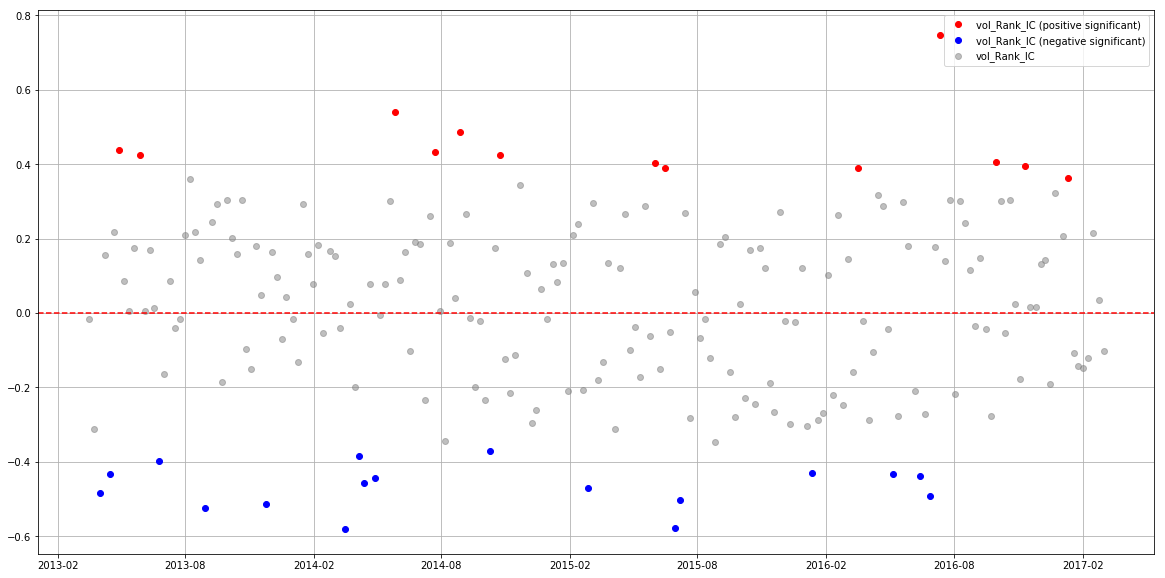

In [51]:
# IC plot of vol on weekly data
plt.figure(figsize=(20,10))
x11 = weekly_IC.vol_pvalue[(weekly_IC.vol_pvalue < 0.05) & (weekly_IC.vol_Rank_IC >= 0)].index
y11 = weekly_IC.vol_Rank_IC[x11]
x12 = weekly_IC.vol_pvalue[(weekly_IC.vol_pvalue < 0.05) & (weekly_IC.vol_Rank_IC < 0)].index
y12 = weekly_IC.vol_Rank_IC[x12]
x2 = weekly_IC.vol_pvalue[weekly_IC.vol_pvalue >= 0.05].index
y2 = weekly_IC.vol_Rank_IC[x2]
print('Positive significant rate: ', len(x11)/(0.0+weekly_IC.shape[0]), 'Negative significant rate: ', len(x12)/(0.0+weekly_IC.shape[0]))
plt.plot(y11, 'o', color='red',label='vol_Rank_IC (positive significant)')
plt.plot(y12, 'o', color='blue',label='vol_Rank_IC (negative significant)')
plt.plot(y2, 'o', alpha=0.5, label='vol_Rank_IC', color='grey')
#plt.plot(range(200), [0 for i in range(200)], 'r--')
plt.axhline(y=0, color='r', linestyle='--')
plt.legend(loc='upper right')
plt.grid()
plt.show()

('Positive significant rate: ', 0.16326530612244897, 'Negative significant rate: ', 0.02040816326530612)


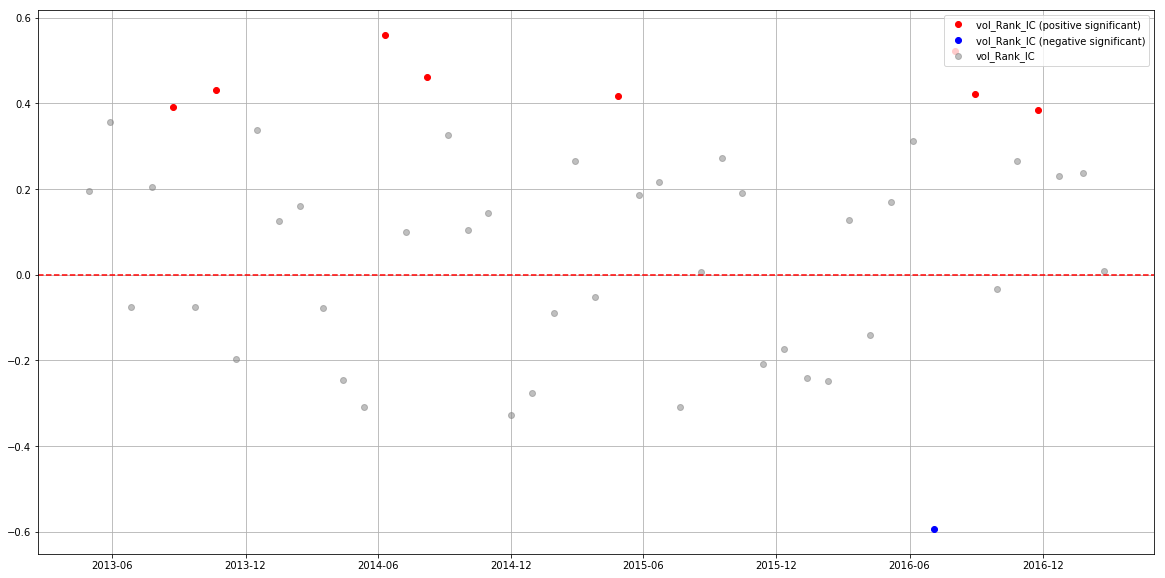

In [52]:
# IC plot of vol on monthly data
plt.figure(figsize=(20,10))
x11 = monthly_IC.vol_pvalue[(monthly_IC.vol_pvalue < 0.05) & (monthly_IC.vol_Rank_IC >= 0)].index
y11 = monthly_IC.vol_Rank_IC[x11]
x12 = monthly_IC.vol_pvalue[(monthly_IC.vol_pvalue < 0.05) & (monthly_IC.vol_Rank_IC < 0)].index
y12 = monthly_IC.vol_Rank_IC[x12]
x2 = monthly_IC.vol_pvalue[monthly_IC.vol_pvalue >= 0.05].index
y2 = monthly_IC.vol_Rank_IC[x2]
print('Positive significant rate: ', len(x11)/(0.0+monthly_IC.shape[0]), 'Negative significant rate: ', len(x12)/(0.0+monthly_IC.shape[0]))
plt.plot(y11, 'o', color='red',label='vol_Rank_IC (positive significant)')
plt.plot(y12, 'o', color='blue',label='vol_Rank_IC (negative significant)')
plt.plot(y2, 'o', alpha=0.5, label='vol_Rank_IC', color='grey')
#plt.plot(range(200), [0 for i in range(200)], 'r--')
plt.axhline(y=0, color='r', linestyle='--')
plt.legend(loc='upper right')
plt.grid()
plt.show()

('Positive significant rate: ', 0.04, 'Negative significant rate: ', 0.06)


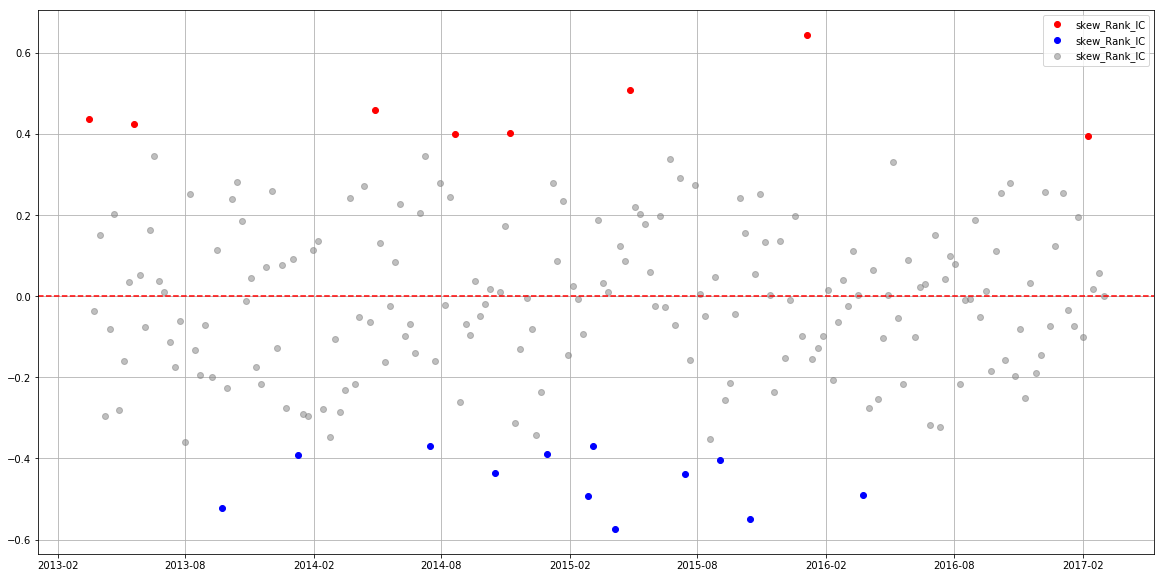

In [53]:
# IC plot of skew on weekly data
plt.figure(figsize=(20,10))
x11 = weekly_IC.skew_pvalue[(weekly_IC.skew_pvalue < 0.05) & (weekly_IC.skew_Rank_IC >= 0)].index
y11 = weekly_IC.skew_Rank_IC[x11]
x12 = weekly_IC.skew_pvalue[(weekly_IC.skew_pvalue < 0.05) & (weekly_IC.skew_Rank_IC < 0)].index
y12 = weekly_IC.skew_Rank_IC[x12]
x2 = weekly_IC.skew_pvalue[weekly_IC.skew_pvalue >= 0.05].index
y2 = weekly_IC.skew_Rank_IC[x2]
print('Positive significant rate: ', len(x11)/(0.0+weekly_IC.shape[0]), 'Negative significant rate: ', len(x12)/(0.0+weekly_IC.shape[0]))
plt.plot(y11, 'o', color='red')
plt.plot(y12, 'o', color='blue')
plt.plot(y2, 'o', alpha=0.5, label='skew_Rank_IC', color='grey')
#plt.plot(range(201), [0 for i in range(201)], 'r--')
plt.axhline(y=0, color='r', linestyle='--')
plt.legend(loc='upper right')
plt.grid()
plt.show()

('Positive significant rate: ', 0.02040816326530612, 'Negative significant rate: ', 0.061224489795918366)


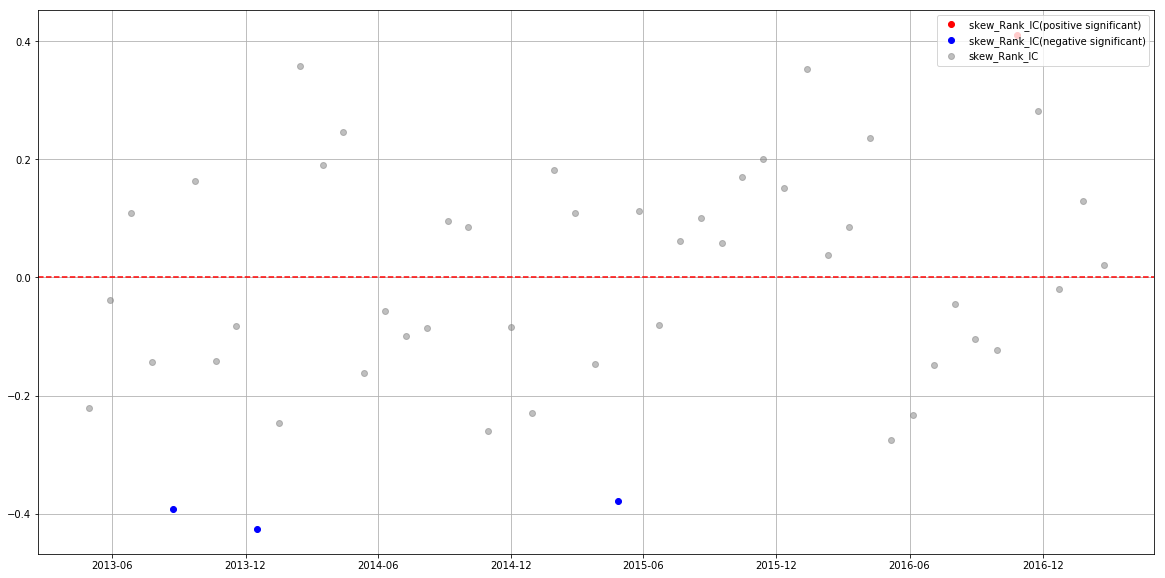

In [54]:
# IC plot of skew on monthly data
plt.figure(figsize=(20,10))
x11 = monthly_IC.skew_pvalue[(monthly_IC.skew_pvalue < 0.05) & (monthly_IC.skew_Rank_IC >= 0)].index
y11 = monthly_IC.skew_Rank_IC[x11]
x12 = monthly_IC.skew_pvalue[(monthly_IC.skew_pvalue < 0.05) & (monthly_IC.skew_Rank_IC < 0)].index
y12 = monthly_IC.skew_Rank_IC[x12]
x2 = monthly_IC.skew_pvalue[monthly_IC.skew_pvalue >= 0.05].index
y2 = monthly_IC.skew_Rank_IC[x2]
print('Positive significant rate: ', len(x11)/(0.0+monthly_IC.shape[0]), 'Negative significant rate: ', len(x12)/(0.0+monthly_IC.shape[0]))
plt.plot(y11, 'o', color='red',label='skew_Rank_IC(positive significant)')
plt.plot(y12, 'o', color='blue',label='skew_Rank_IC(negative significant)')
plt.plot(y2, 'o', alpha=0.5, label='skew_Rank_IC', color='grey')
#plt.plot(range(201), [0 for i in range(201)], 'r--')
plt.axhline(y=0, color='r', linestyle='--')
plt.legend(loc='upper right')
plt.grid()
plt.show()

('Positive significant rate: ', 0.05, 'Negative significant rate: ', 0.085)


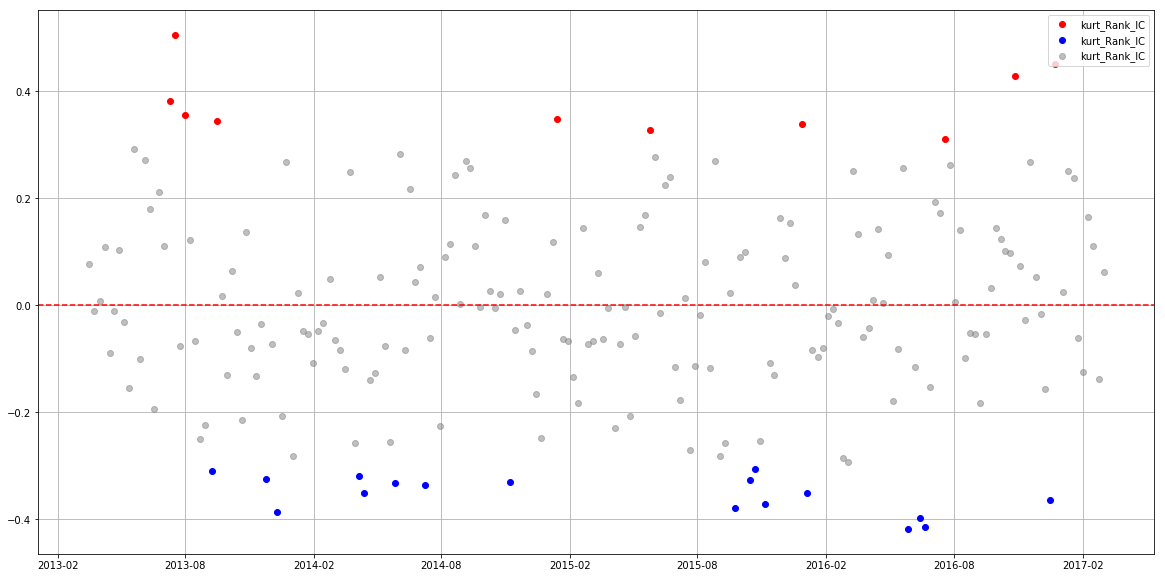

In [55]:
# IC plot of kurt on weekly data
plt.figure(figsize=(20,10))
x11 = weekly_IC.kurt_pvalue[(weekly_IC.kurt_pvalue < 0.1) & (weekly_IC.kurt_Rank_IC >= 0)].index
y11 = weekly_IC.kurt_Rank_IC[x11]
x12 = weekly_IC.kurt_pvalue[(weekly_IC.kurt_pvalue < 0.1) & (weekly_IC.kurt_Rank_IC < 0)].index
y12 = weekly_IC.kurt_Rank_IC[x12]
x2 = weekly_IC.kurt_pvalue[weekly_IC.kurt_pvalue >= 0.1].index
y2 = weekly_IC.kurt_Rank_IC[x2]
print('Positive significant rate: ', len(x11)/(0.0+weekly_IC.shape[0]), 'Negative significant rate: ', len(x12)/(0.0+weekly_IC.shape[0]))
plt.plot(x11, y11, 'o', color='red')
plt.plot(x12, y12, 'o', color='blue')
plt.plot(x2, y2, 'o', alpha=0.5, label='kurt_Rank_IC', color='grey')
#plt.plot(range(201), [0 for i in range(201)], 'r--')
plt.axhline(y=0, color='r', linestyle='--')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [56]:
len(x11)#/monthly_IC.shape[0]

10

('Positive significant rate: ', 0.10204081632653061, 'Negative significant rate: ', 0.061224489795918366)


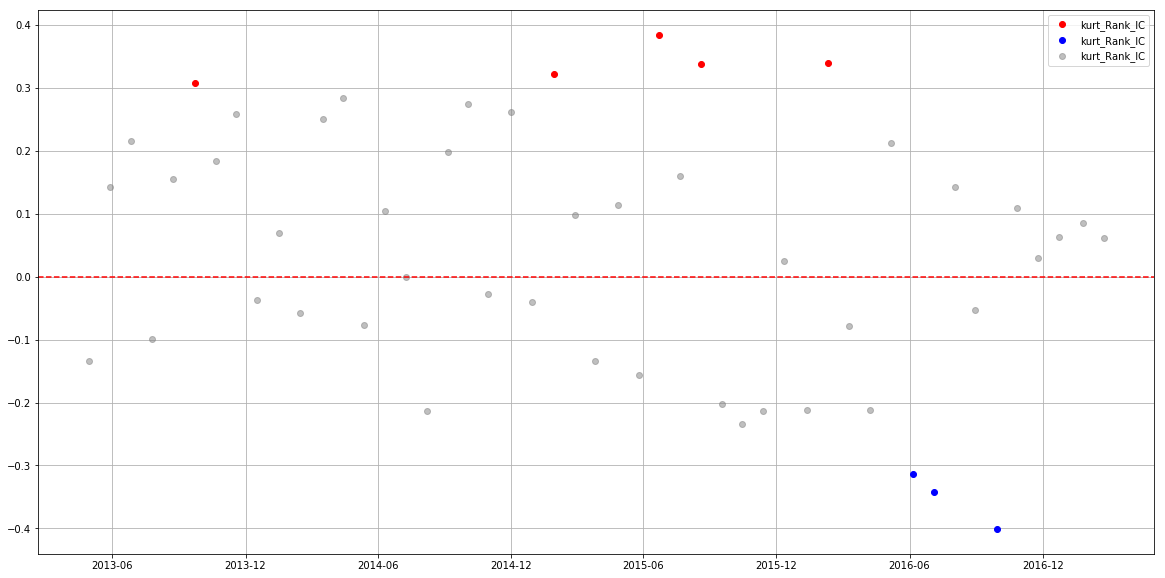

In [57]:
# IC plot of kurt on monthly data
plt.figure(figsize=(20,10))
x11 = monthly_IC.kurt_pvalue[(monthly_IC.kurt_pvalue < 0.1) & (monthly_IC.kurt_Rank_IC >= 0)].index
y11 = monthly_IC.kurt_Rank_IC[x11]
x12 = monthly_IC.kurt_pvalue[(monthly_IC.kurt_pvalue < 0.1) & (monthly_IC.kurt_Rank_IC < 0)].index
y12 = monthly_IC.kurt_Rank_IC[x12]
x2 = monthly_IC.kurt_pvalue[monthly_IC.kurt_pvalue >= 0.1].index
y2 = monthly_IC.kurt_Rank_IC[x2]
print('Positive significant rate: ', len(x11)/(monthly_IC.shape[0]+0.0), 'Negative significant rate: ', len(x12)/(monthly_IC.shape[0]+0.0))
plt.plot(x11, y11, 'o', color='red')
plt.plot(x12, y12, 'o', color='blue')
plt.plot(x2, y2, 'o', alpha=0.5, label='kurt_Rank_IC', color='grey')
#plt.plot(range(201), [0 for i in range(201)], 'r--')
plt.axhline(y=0, color='r', linestyle='--')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [58]:
company_beta_pval.shape

(200, 12)

In [59]:
# stocks having significant beta1_vol
print company_beta_pval[['vol_intercept','b_vol','vol_p_val']][company_beta_pval.vol_p_val <= 0.05]
company_beta_pval[['vol_intercept','b_vol','vol_p_val']][company_beta_pval.vol_p_val <= 0.05].shape

     vol_intercept     b_vol  vol_p_val
2         0.071418 -0.427219   0.020926
4         0.055381 -0.347703   0.039734
6        -0.074692  0.423960   0.007181
10       -0.034438  0.188416   0.012714
14        0.044741 -0.380838   0.008319
35        0.046061 -0.329972   0.027715
50        0.038091 -0.420892   0.000522
52        0.033307 -0.141098   0.027226
60       -0.015709  0.276599   0.002978
68       -0.032375  0.322526   0.018117
70        0.020025 -0.223526   0.045689
73       -0.032846  0.366004   0.005750
79        0.035249 -0.423374   0.005113
81       -0.026944  0.222469   0.029923
85       -0.018261  0.255838   0.048043
87        0.028941 -0.226993   0.045939
88        0.004137 -0.339746   0.027292
103       0.032419 -0.146372   0.001107
111      -0.026341  0.256638   0.035854
115       0.006673 -0.323678   0.039352
116       0.056995 -0.501644   0.003958
136      -0.029443  0.180613   0.044059
142       0.025681 -0.421017   0.007473
145      -0.023925  0.184790   0.039164


(32, 3)

In [60]:
monthly_beta_pval.shape

(49, 12)

In [61]:
# stocks having significant beta1_vol
print monthly_beta_pval[['vol_intercept','b_vol','vol_p_val']][monthly_beta_pval.vol_p_val <= 0.05]
monthly_beta_pval[['vol_intercept','b_vol','vol_p_val']][monthly_beta_pval.vol_p_val <= 0.05].shape

    vol_intercept     b_vol  vol_p_val
1       -0.073733  0.662726   0.028495
4       -0.135781  0.797485   0.031006
6       -0.089223  0.735814   0.020363
8       -0.078885  0.570001   0.019505
14      -0.063268  0.612462   0.003361
16      -0.130033  0.926063   0.013425
40       0.129327 -0.950125   0.006542
41      -0.110491  0.960898   0.007369
42      -0.056031  0.571917   0.035424
45      -0.125989  1.307026   0.015124


(10, 3)

In [62]:
# stocks having significant beta1_skew
company_beta_pval[['skew_intercept','b_skew','skew_p_val']][company_beta_pval.skew_p_val <0.05].shape

(20, 3)

In [63]:
# stocks having significant beta1_skew
monthly_beta_pval[['skew_intercept','b_skew','skew_p_val']][monthly_beta_pval.skew_p_val <= 0.05]

,skew_intercept,b_skew,skew_p_val
8,0.000322,-0.075893,0.036246
10,-0.009554,0.084750,0.023803
44,0.007197,0.074632,0.039120


In [64]:
# Stocks having significant beta1_kurt
company_beta_pval[['kurt_intercept','b_kurt','kurt_p_val']][company_beta_pval.kurt_p_val <= 0.05].shape

(16, 3)

In [65]:
# Stocks having significant beta1_kurt
monthly_beta_pval[['kurt_intercept','b_kurt','kurt_p_val']][monthly_beta_pval.kurt_p_val <= 0.05]

,kurt_intercept,b_kurt,kurt_p_val
11,-0.066923,0.014550,0.041364
34,0.088152,-0.025933,0.018840
39,0.121637,-0.019267,0.039264
43,0.080793,-0.016732,0.015578


In [66]:
company_beta_pval.shape

(200, 12)

In [67]:
monthly_beta_pval.shape

(49, 12)

In [68]:
company_beta_pval.mean()

vol_intercept     0.000855
b_vol             0.011892
vol_p_val         0.377512
vol_R2            0.062604
skew_intercept    0.002484
b_skew           -0.001397
skew_p_val        0.446688
skew_R2           0.049874
kurt_intercept    0.003865
b_kurt           -0.000266
kurt_p_val        0.457804
kurt_R2           0.040744
dtype: float64

In [69]:
monthly_beta_pval.mean()

vol_intercept    -0.011920
b_vol             0.158607
vol_p_val         0.317899
vol_R2            0.070748
skew_intercept    0.010803
b_skew           -0.001318
skew_p_val        0.469226
skew_R2           0.035209
kurt_intercept   -0.001543
b_kurt            0.002377
kurt_p_val        0.475146
kurt_R2           0.041129
dtype: float64

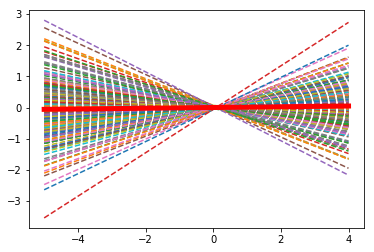

In [70]:
# Linear regression of return on vol
x = np.arange(-5,5)
for row in range(1, company_beta_pval.shape[0]):
    plt.plot(x, company_beta_pval.vol_intercept[row] + x*company_beta_pval.b_vol[row], '--')
plt.plot(x, company_beta_pval.vol_intercept.mean() + x*company_beta_pval.b_vol.mean(), color = 'red', lw = 5)
plt.show()

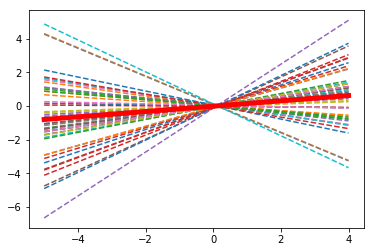

In [71]:
# Linear regression of return on vol
x = np.arange(-5,5)
for row in range(1, monthly_beta_pval.shape[0]):
    plt.plot(x, monthly_beta_pval.vol_intercept[row] + x*monthly_beta_pval.b_vol[row], '--')
plt.plot(x, monthly_beta_pval.vol_intercept.mean() + x*monthly_beta_pval.b_vol.mean(), color = 'red', lw = 5)
plt.show()

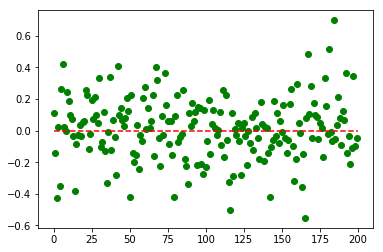

In [72]:
plt.plot(company_beta_pval.b_vol, 'o', alpha = 1, color = 'green')
plt.plot(range(201), [0 for i in range(201)], 'r--')

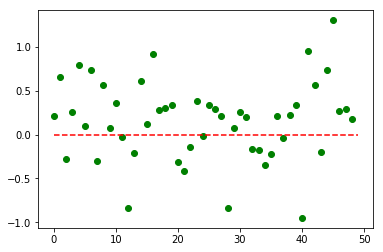

In [73]:
plt.plot(monthly_beta_pval.b_vol, 'o', alpha = 1, color = 'green')
plt.plot(range(50), [0 for i in range(50)], 'r--')

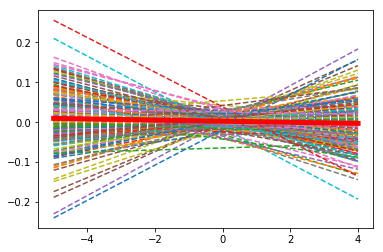

In [74]:
# Linear regression of return on skew
x = np.arange(-5,5)
for row in range(1, company_beta_pval.shape[0]):
    plt.plot(x, company_beta_pval.skew_intercept[row] + x*company_beta_pval.b_skew[row], '--')
plt.plot(x, company_beta_pval.skew_intercept.mean() + x*company_beta_pval.b_skew.mean(), color = 'red', lw = 5)
plt.show()

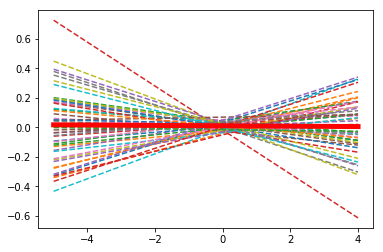

In [75]:
# Linear regression of return on skew
x = np.arange(-5,5)
for row in range(1, monthly_beta_pval.shape[0]):
    plt.plot(x, monthly_beta_pval.skew_intercept[row] + x*monthly_beta_pval.b_skew[row], '--')
plt.plot(x, monthly_beta_pval.skew_intercept.mean() + x*monthly_beta_pval.b_skew.mean(), color = 'red', lw = 5)
plt.show()

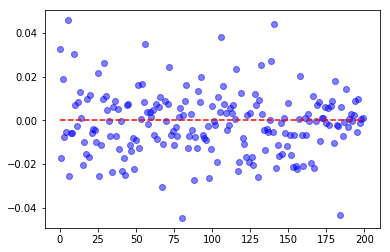

In [76]:
plt.plot(company_beta_pval.b_skew, 'o', alpha = 0.5, color = 'blue')
plt.plot(range(201), [0 for i in range(201)], 'r--')

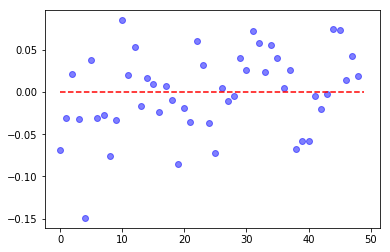

In [77]:
plt.plot(monthly_beta_pval.b_skew, 'o', alpha = 0.5, color = 'blue')
plt.plot(range(50), [0 for i in range(50)], 'r--')

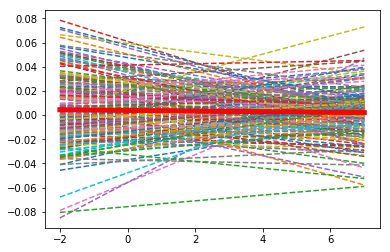

In [78]:
# Linear regression of return on kurt
x = np.arange(-2, 8)
for row in range(1, company_beta_pval.shape[0]):
    plt.plot(x, company_beta_pval.kurt_intercept[row] + x*company_beta_pval.b_kurt[row], '--')
plt.plot(x, company_beta_pval.kurt_intercept.mean() + x*company_beta_pval.b_kurt.mean(), color = 'red', lw = 5)
plt.show()

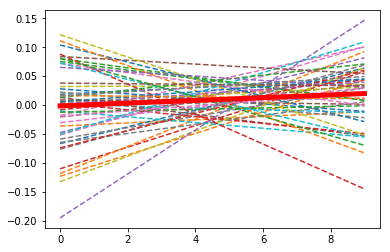

In [79]:
# Linear regression of return on kurt
x = np.arange(0, 10)
for row in range(1, monthly_beta_pval.shape[0]):
    plt.plot(x, monthly_beta_pval.kurt_intercept[row] + x*monthly_beta_pval.b_kurt[row], '--')
plt.plot(x, monthly_beta_pval.kurt_intercept.mean() + x*monthly_beta_pval.b_kurt.mean(), color = 'red', lw = 5)
plt.show()

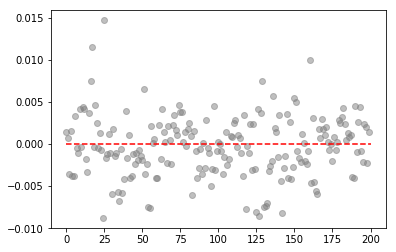

In [80]:
plt.plot(company_beta_pval.b_kurt, 'o', alpha = 0.5, color = 'grey')
plt.plot(range(201), [0 for i in range(201)], 'r--')

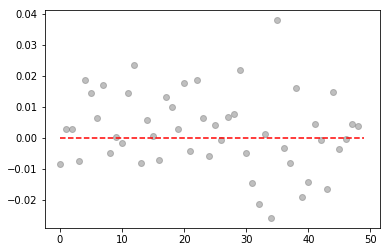

In [81]:
plt.plot(monthly_beta_pval.b_kurt, 'o', alpha = 0.5, color = 'grey')
plt.plot(range(50), [0 for i in range(50)], 'r--')

In [82]:
# sorting on RDVol, RDSkew, RDKurt

In [83]:
# return_by_group_vol
group_name = ['group1', 'group2', 'group3']
n_stock_grp = int(30/len(group_name))
return_by_group_vol = pd.DataFrame(columns = group_name)
tmp_list = []
for week in range(total_week-1):
    vol_this_week = sorted([(com, weekly_data[com].RVol[week]) for com in weekly_data.keys()], key = lambda x: x[1])
    #print (vol_this_week)
    group_return_list = []
    for i in range(len(group_name)):
        cur_group, _ = zip(*vol_this_week[n_stock_grp*i : n_stock_grp*i+n_stock_grp])
        r_ = []
        for com in cur_group:
            r_.append(weekly_data[com].WR[week+1])
        group_return_list.append(np.mean(r_))
    tmp_list.append(dict(zip(group_name, group_return_list)))
return_by_group_vol = return_by_group_vol.append(tmp_list)
return_by_group_vol.index = weekly_data['AAPL'].index[1:]

In [86]:
# return_by_group_vol_monthly
group_name = ['group1', 'group2', 'group3']
n_stock_grp = int(30/len(group_name))
return_by_group_vol_monthly = pd.DataFrame(columns = group_name)
tmp_list = []
for month in range(total_month-1):
    vol_this_month = sorted([(com, monthly_data[com].RVol[month]) for com in monthly_data.keys()], key = lambda x: x[1])#return a tuple (com,RVol)
    group_return_list = []
    for i in range(len(group_name)):
        cur_group, _ = zip(*vol_this_month[n_stock_grp*i : n_stock_grp*i+n_stock_grp]) #separate every 10 stocks, and unzip the list
        r_ = []
        for com in cur_group:
            r_.append(monthly_data[com].MR[month+1])#get returns in next week
        group_return_list.append(np.mean(r_))#equal weighted portfolio
    tmp_list.append(dict(zip(group_name, group_return_list)))
return_by_group_vol_monthly = return_by_group_vol_monthly.append(tmp_list)
return_by_group_vol_monthly.index = monthly_data['AAPL'].index[1:] #Since first week's return does not exist 

In [87]:
print return_by_group_vol_monthly.mean()
print return_by_group_vol_monthly.sum()

group1    0.006738
group2    0.008601
group3    0.015186
dtype: float64
group1    0.330148
group2    0.421453
group3    0.744103
dtype: float64


In [91]:
# double sorting return_by_group_vol_subgroup_skew_monthly
group_name_vol = ['group1', 'group2', 'group3']
sub_group_name_vol=[grp+str(i) for grp in group_name_vol for i in range(1,4)]

n_stock_grp = int(30/len(group_name_vol))
n_sub_grp = int(n_stock_grp/3)

return_by_group_vol_subgroup_skew_monthly = pd.DataFrame(columns = sub_group_name_vol)
#return_by_group_vol_subgroup_skew_monthly.index=monthly_data['AAPL'].index[1:]
tmp_list = []

for month in range(total_month-1):
    vol_this_month = sorted([(com, monthly_data[com].RVol[month]) for com in monthly_data.keys()], key = lambda x: x[1])#return a tuple (com,RVol)
    group_return_list = []
    for i in range(len(group_name_vol)):
        cur_group, _ = zip(*vol_this_month[n_stock_grp*i : n_stock_grp*i+n_stock_grp]) #separate every 10 stocks, and unzip the list
        r_ = []
        #print cur_group
        #for j in range(2):
            #for com in cur_group:
        skew_this_month=sorted([(com, monthly_data[com].RSkew[month]) for com in cur_group], key = lambda x: x[1])#return a tuple (com,RVol)
        #print skew_this_month
        for j in range(3):
            if j==1:
                cur_subgroup, _ = zip(*skew_this_month[n_sub_grp*j : n_sub_grp*j+n_sub_grp+1])
            elif j==2:
                cur_subgroup, _ = zip(*skew_this_month[n_sub_grp*j+1 : ])
            else:
                cur_subgroup, _ = zip(*skew_this_month[n_sub_grp*j : n_sub_grp*j+n_sub_grp]) #separate every 5 stocks, and unzip the list
            r_sub = []
            for com in cur_subgroup:
                r_sub.append(monthly_data[com].MR[month+1])#get returns in next week
            group_return_list.append(np.mean(r_sub))
         
    tmp_list.append(dict(zip(sub_group_name_vol,group_return_list)))   
return_by_group_vol_subgroup_skew_monthly = return_by_group_vol_subgroup_skew_monthly.append(tmp_list)
return_by_group_vol_subgroup_skew_monthly.index = monthly_data['AAPL'].index[1:]

In [92]:
return_by_group_vol_subgroup_skew_monthly.shape

(49, 9)

In [132]:
return_by_group_vol_subgroup_skew_monthly.head()

,group11,group12,group13,group21,group22,group23,group31,group32,group33
2013-04-30,0.008763,0.005627,-0.004896,0.024993,0.055299,0.018093,0.031282,0.069599,0.001018
2013-05-29,0.025167,0.017351,-0.007827,0.049466,0.030424,0.042736,0.073034,0.075811,0.020922
2013-06-26,-0.040797,-0.016035,-0.006425,-0.005580,-0.038050,-0.017236,-0.064625,0.008761,-0.028365
2013-07-25,0.034554,0.057854,0.041388,-0.005874,0.039057,0.044865,0.086840,0.040403,0.037310
2013-08-23,-0.037362,-0.042761,-0.036995,-0.050437,-0.050940,-0.047665,0.103361,0.030225,-0.030213


In [94]:
print list(return_by_group_vol_subgroup_skew_monthly.mean())#.mean()
print list(return_by_group_vol_subgroup_skew_monthly.sum())

[0.004035898461586987, 0.008989452180521027, 0.0064372460512873535, 0.009226200725243928, 0.006629761176231649, 0.010604401283610029, 0.01257614284223585, 0.020146075056590506, 0.011181703617740592]
[0.19775902461776235, 0.4404831568455303, 0.31542505651308034, 0.45208383553695247, 0.3248582976353508, 0.5196156628968914, 0.6162309992695567, 0.9871576777729347, 0.547903477269289]


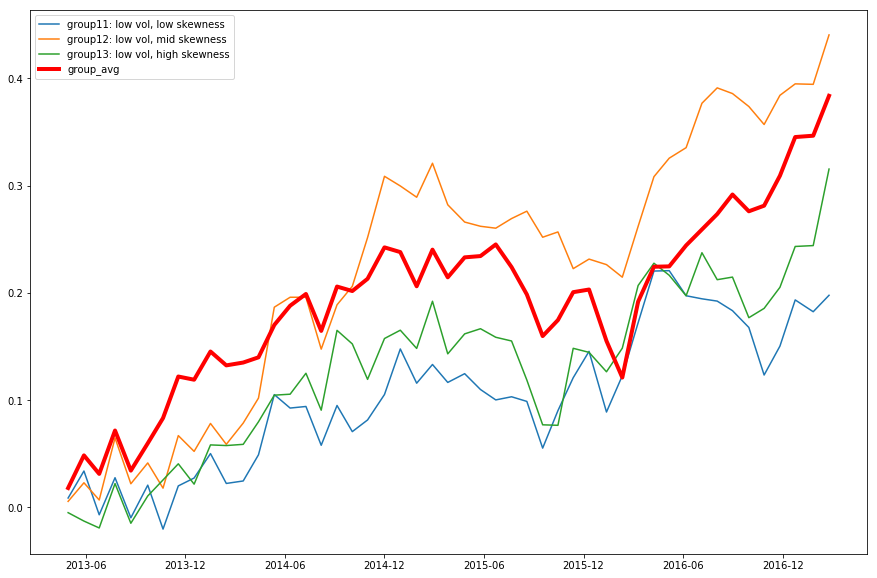

In [95]:
plt.figure(figsize=(15,10))
plt.plot(return_by_group_vol_subgroup_skew_monthly.group11.index, return_by_group_vol_subgroup_skew_monthly.group11.cumsum(), label = 'group11: low vol, low skewness')
plt.plot(return_by_group_vol_subgroup_skew_monthly.group12.index, return_by_group_vol_subgroup_skew_monthly.group12.cumsum(), label = 'group12: low vol, mid skewness')
plt.plot(return_by_group_vol_subgroup_skew_monthly.group13.index, return_by_group_vol_subgroup_skew_monthly.group13.cumsum(), label = 'group13: low vol, high skewness')
#plt.plot(return_by_group_vol_subgroup_skew_monthly.group21.index, return_by_group_vol_subgroup_skew_monthly.group21.cumsum(), label = 'group21: mid vol, low skewness')
#plt.plot(return_by_group_vol_subgroup_skew_monthly.group22.index, return_by_group_vol_subgroup_skew_monthly.group22.cumsum(), label = 'group22: mid vol, mid skewness')
#plt.plot(return_by_group_vol_subgroup_skew_monthly.group23.index, return_by_group_vol_subgroup_skew_monthly.group23.cumsum(), label = 'group23: mid vol, high skewness')
#plt.plot(return_by_group_vol_subgroup_skew_monthly.group31.index, return_by_group_vol_subgroup_skew_monthly.group31.cumsum(), label = 'group31: high vol, low skewness')
#plt.plot(return_by_group_vol_subgroup_skew_monthly.group32.index, return_by_group_vol_subgroup_skew_monthly.group32.cumsum(), label = 'group32: high vol, mid skewness')
#plt.plot(return_by_group_vol_subgroup_skew_monthly.group33.index, return_by_group_vol_subgroup_skew_monthly.group33.cumsum(), label = 'group33: high vol, high skewness')
plt.plot(return_by_group_vol_subgroup_skew_monthly.median(axis=1).cumsum(), label = 'group_avg',color='red', lw = 4)
plt.legend(loc = 'upper left')

In [96]:
# double sorting return_by_group_skew_subgroup_vol_monthly
group_name_skew = ['group1', 'group2', 'group3']
sub_group_name_vol=[grp+str(i) for grp in group_name_skew for i in range(1,4)]

n_stock_grp = int(30/len(group_name_skew))
n_sub_grp = int(n_stock_grp/3)

return_by_group_skew_subgroup_vol_monthly = pd.DataFrame(columns = sub_group_name_vol)
#return_by_group_skew_subgroup_vol_monthly.index=monthly_data['AAPL'].index[1:]
tmp_list = []

for month in range(total_month-1):
    skew_this_month = sorted([(com, monthly_data[com].RSkew[month]) for com in monthly_data.keys()], key = lambda x: x[1])#return a tuple (com,RVol)
    group_return_list = []
    for i in range(len(group_name_skew)):
        cur_group, _ = zip(*skew_this_month[n_stock_grp*i : n_stock_grp*i+n_stock_grp]) #separate every 10 stocks, and unzip the list

        r_ = []
        #print cur_group
        #for j in range(2):
            #for com in cur_group:
        vol_this_month=sorted([(com, monthly_data[com].RVol[month]) for com in cur_group], key = lambda x: x[1])#return a tuple (com,RVol)

        for j in range(3):
            if j==1:
                cur_subgroup, _ = zip(*vol_this_month[n_sub_grp*j : n_sub_grp*j+n_sub_grp+1])
            elif j==2:
                cur_subgroup, _ = zip(*vol_this_month[n_sub_grp*j+1 : ])
            else:
                cur_subgroup, _ = zip(*vol_this_month[n_sub_grp*j : n_sub_grp*j+n_sub_grp]) #separate every 5 stocks, and unzip the list
            r_sub = []
            for com in cur_subgroup:
                r_sub.append(monthly_data[com].MR[month+1])#get returns in next week
            group_return_list.append(np.mean(r_sub))

    tmp_list.append(dict(zip(sub_group_name_vol,group_return_list)))   
return_by_group_skew_subgroup_vol_monthly = return_by_group_skew_subgroup_vol_monthly.append(tmp_list)
return_by_group_skew_subgroup_vol_monthly.index = monthly_data['AAPL'].index[1:]

In [97]:
return_by_group_skew_subgroup_vol_monthly.shape

(49, 9)

In [98]:
print return_by_group_skew_subgroup_vol_monthly.mean()
print return_by_group_skew_subgroup_vol_monthly.sum()

group11    0.007336
group12    0.010924
group13    0.012526
group21    0.002867
group22    0.006220
group23    0.019529
group31    0.007370
group32    0.010501
group33    0.015260
dtype: float64
group11    0.359482
group12    0.535267
group13    0.613785
group21    0.140486
group22    0.304791
group23    0.956897
group31    0.361115
group32    0.514561
group33    0.747759
dtype: float64


In [100]:
# vol_max = return_by_subgroup_vol_monthly.idxmax(axis = 1)
# plt.figure(figsize=(20,10))
# plt.subplot(211)
# plt.bar(return_by_subgroup_vol_monthly.group11.index, return_by_subgroup_vol_monthly.group11, label = 'group11: small vol, low skew', width = 5, color = 'blue')
# plt.plot(return_by_subgroup_vol_monthly.group11[vol_max[vol_max == 'group11'].index], 'ro')
# plt.legend(loc = 'lower left')
# plt.subplot(212)
# plt.bar(return_by_subgroup_vol_monthly.group12.index, return_by_subgroup_vol_monthly.group12, label = 'group12: mid vol, high skew', width = 5, color = 'orange')
# plt.plot(return_by_subgroup_vol_monthly.group12[vol_max[vol_max == 'group12'].index], 'ro')
# plt.legend(loc = 'lower left')
# #plt.subplot(313)
# #plt.bar(return_by_subgroup_vol_monthly.group13.index, return_by_subgroup_vol_monthly.group13, label = 'group13: high vol,', width = 5, color = 'green')
# #plt.plot(return_by_subgroup_vol_monthly.group3[vol_max[vol_max == 'group3'].index], 'ro')
# ##plt.bar(range(len(DJIA_weekly[:-50])), DJIA_weekly[:-50], alpha = 0.5, label = 'DJIA', lw = 4)
# plt.legend(loc = 'lower left')
# plt.show()
# print ('group1 win rate: ', len(vol_max[vol_max == 'group1'])/float(len(vol_max)),'\n',\
#        'group2 win rate: ', len(vol_max[vol_max == 'group2'])/float(len(vol_max)), '\n',\
#        'group3 win rate: ', len(vol_max[vol_max == 'group3'])/float(len(vol_max)))

In [101]:
return_by_group_vol.sum(axis=0)
return_by_group_vol.mean(axis=0)

group1    0.001631
group2    0.002706
group3    0.003462
dtype: float64

In [102]:
return_by_group_vol_monthly.sum()

group1    0.330148
group2    0.421453
group3    0.744103
dtype: float64

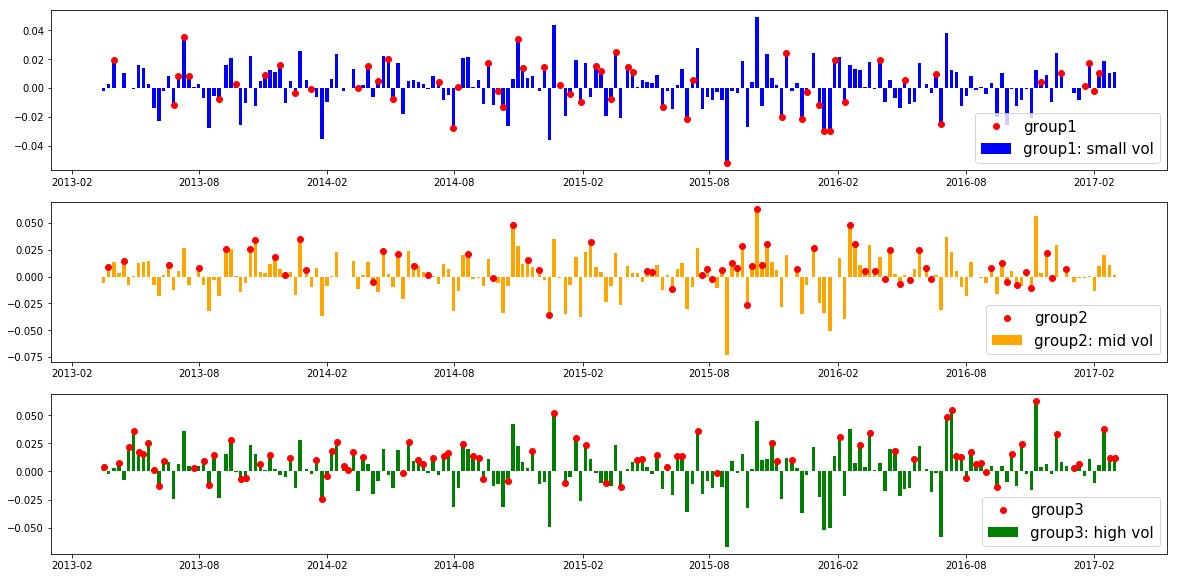

('group1 win rate: ', 0.285, '\n', 'group2 win rate: ', 0.3, '\n', 'group3 win rate: ', 0.415)


In [103]:
vol_max = return_by_group_vol.idxmax(axis = 1)
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.bar(return_by_group_vol.group1.index, return_by_group_vol.group1, label = 'group1: small vol', width = 5, color = 'blue')
plt.plot(return_by_group_vol.group1[vol_max[vol_max == 'group1'].index], 'ro')
plt.legend(loc = 'lower right',prop={'size':15})
plt.subplot(312)
plt.bar(return_by_group_vol.group2.index, return_by_group_vol.group2, label = 'group2: mid vol', width = 5, color = 'orange')
plt.plot(return_by_group_vol.group2[vol_max[vol_max == 'group2'].index], 'ro')
plt.legend(loc = 'lower right',prop={'size':15})
plt.subplot(313)
plt.bar(return_by_group_vol.group3.index, return_by_group_vol.group3, label = 'group3: high vol', width = 5, color = 'green')
plt.plot(return_by_group_vol.group3[vol_max[vol_max == 'group3'].index], 'ro')
#plt.bar(range(len(DJIA_weekly[:-50])), DJIA_weekly[:-50], alpha = 0.5, label = 'DJIA', lw = 4)
plt.legend(loc = 'lower right',prop={'size':15})
plt.show()
print ('group1 win rate: ', len(vol_max[vol_max == 'group1'])/float(len(vol_max)),'\n',\
       'group2 win rate: ', len(vol_max[vol_max == 'group2'])/float(len(vol_max)), '\n',\
       'group3 win rate: ', len(vol_max[vol_max == 'group3'])/float(len(vol_max)))

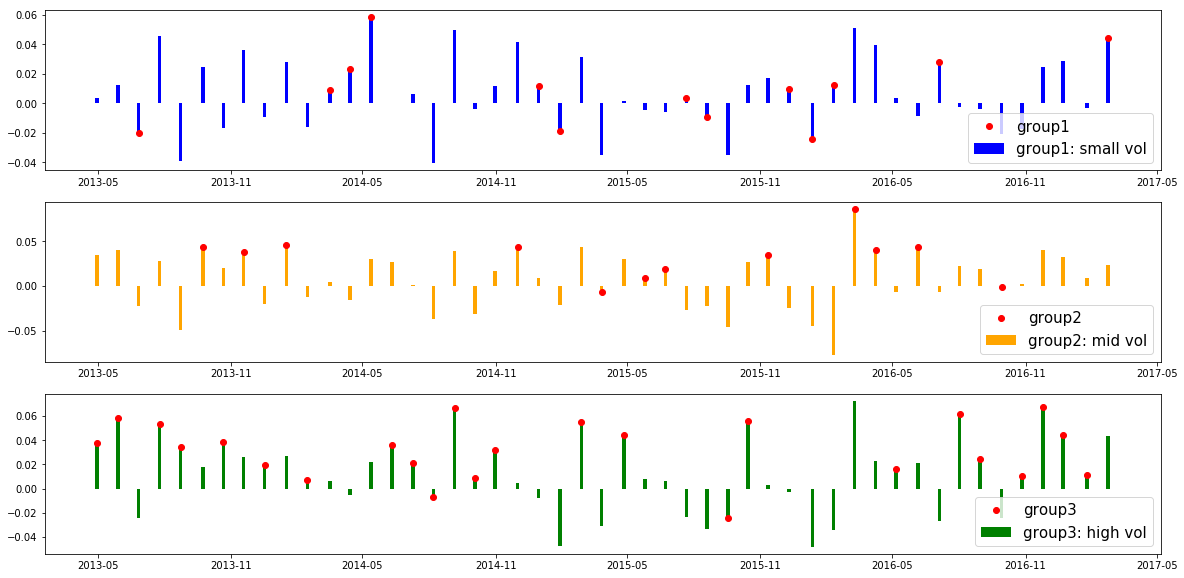

('group1 win rate: ', 0.2653061224489796, '\n', 'group2 win rate: ', 0.24489795918367346, '\n', 'group3 win rate: ', 0.4897959183673469)


In [104]:
vol_max = return_by_group_vol_monthly.idxmax(axis = 1)
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.bar(return_by_group_vol_monthly.group1.index, return_by_group_vol_monthly.group1, label = 'group1: small vol', width = 5, color = 'blue')
plt.plot(return_by_group_vol_monthly.group1[vol_max[vol_max == 'group1'].index], 'ro')
plt.legend(loc = 'lower right',prop={'size':15})
plt.subplot(312)
plt.bar(return_by_group_vol_monthly.group2.index, return_by_group_vol_monthly.group2, label = 'group2: mid vol', width = 5, color = 'orange')
plt.plot(return_by_group_vol_monthly.group2[vol_max[vol_max == 'group2'].index], 'ro')
plt.legend(loc = 'lower right',prop={'size':15})
plt.subplot(313)
plt.bar(return_by_group_vol_monthly.group3.index, return_by_group_vol_monthly.group3, label = 'group3: high vol', width = 5, color = 'green')
plt.plot(return_by_group_vol_monthly.group3[vol_max[vol_max == 'group3'].index], 'ro')
#plt.bar(range(len(DJIA_weekly[:-50])), DJIA_weekly[:-50], alpha = 0.5, label = 'DJIA', lw = 4)
plt.legend(loc = 'lower right',prop={'size':15})
plt.show()
print ('group1 win rate: ', len(vol_max[vol_max == 'group1'])/float(len(vol_max)),'\n',\
       'group2 win rate: ', len(vol_max[vol_max == 'group2'])/float(len(vol_max)), '\n',\
       'group3 win rate: ', len(vol_max[vol_max == 'group3'])/float(len(vol_max)))

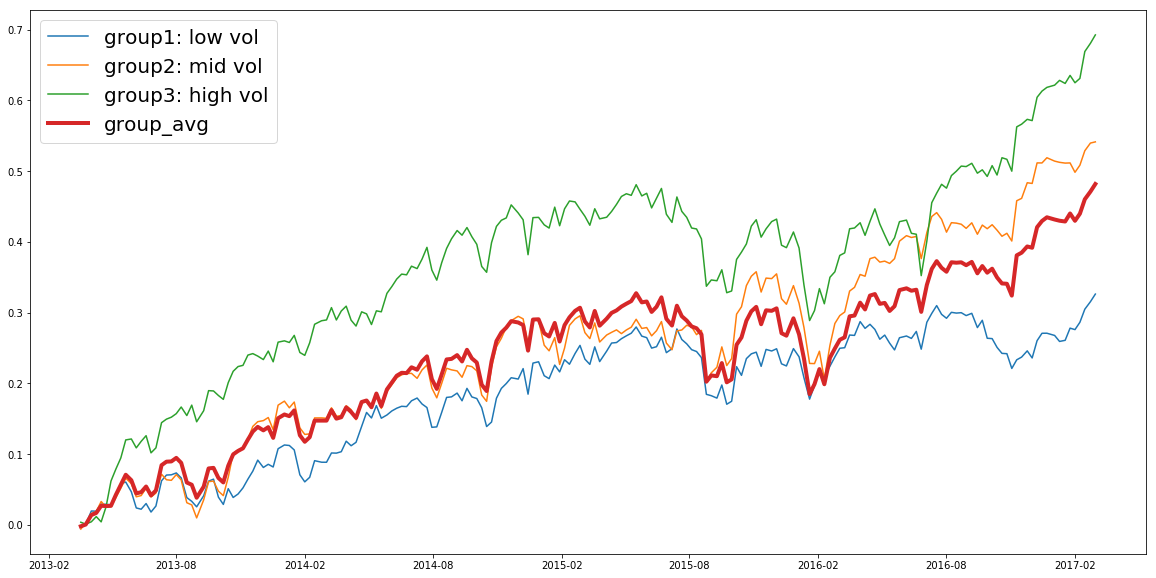

In [105]:
plt.figure(figsize=(20,10))
plt.plot(return_by_group_vol.group1.index, return_by_group_vol.group1.cumsum(), label = 'group1: low vol')
plt.plot(return_by_group_vol.group2.index, return_by_group_vol.group2.cumsum(), label = 'group2: mid vol')
plt.plot(return_by_group_vol.group3.index, return_by_group_vol.group3.cumsum(), label = 'group3: high vol')
plt.plot(return_by_group_vol.median(axis=1).cumsum(), label = 'group_avg', lw = 4)
plt.legend(loc = 'upper left',prop={'size':20})

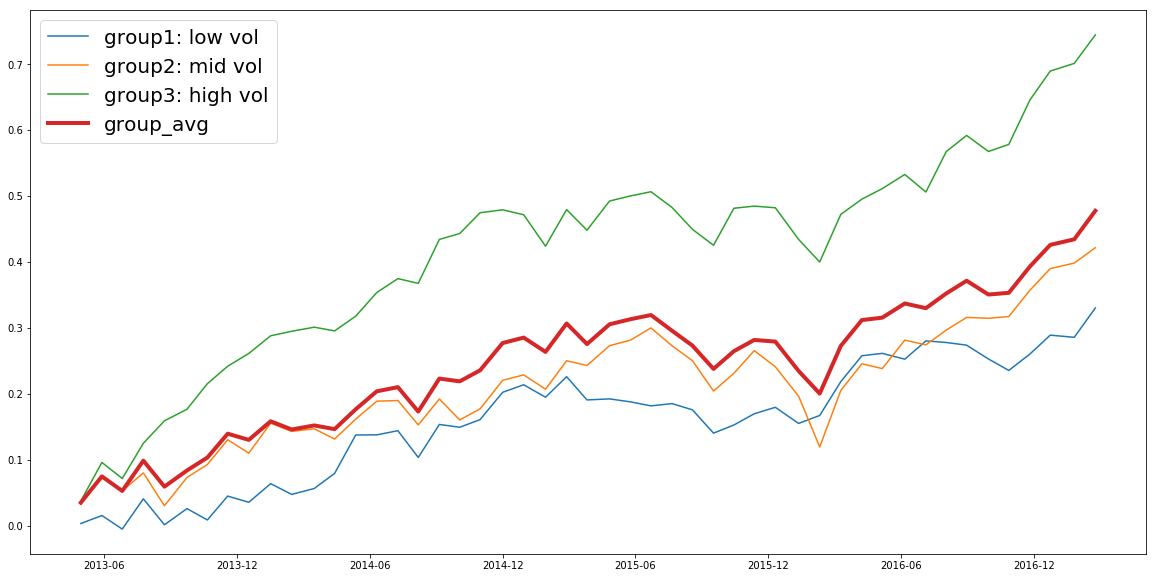

In [106]:
plt.figure(figsize=(20,10))
plt.plot(return_by_group_vol_monthly.group1.index, return_by_group_vol_monthly.group1.cumsum(), label = 'group1: low vol')
plt.plot(return_by_group_vol_monthly.group2.index, return_by_group_vol_monthly.group2.cumsum(), label = 'group2: mid vol')
plt.plot(return_by_group_vol_monthly.group3.index, return_by_group_vol_monthly.group3.cumsum(), label = 'group3: high vol')
plt.plot(return_by_group_vol_monthly.median(axis=1).cumsum(), label = 'group_avg', lw = 4)
plt.legend(loc = 'upper left',prop={'size': 20})

In [107]:
# return_by_group_skew
group_name = ['group1', 'group2', 'group3']
n_stock_grp = int(30/len(group_name))
return_by_group_skew = pd.DataFrame(columns = group_name)
tmp_list = []
for week in range(total_week-1):
    skew_this_week = sorted([(com, weekly_data[com].RSkew[week]) for com in weekly_data.keys()], key = lambda x: x[1])
    group_return_list = []
    for i in range(len(group_name)):
        cur_group, _ = zip(*skew_this_week[n_stock_grp*i : n_stock_grp*i+n_stock_grp])
        r_ = []
        for com in cur_group:
            r_.append(weekly_data[com].WR[week+1])
        group_return_list.append(np.mean(r_))
    tmp_list.append(dict(zip(group_name, group_return_list)))
return_by_group_skew = return_by_group_skew.append(tmp_list)
return_by_group_skew.index = weekly_data['AAPL'].index[1:]

In [108]:
# return_by_group_skew_monthly
group_name = ['group1', 'group2', 'group3']
n_stock_grp = int(30/len(group_name))
return_by_group_skew_monthly = pd.DataFrame(columns = group_name)
tmp_list = []
for month in range(total_month-1):
    skew_this_month = sorted([(com, monthly_data[com].RSkew[month]) for com in monthly_data.keys()], key = lambda x: x[1])
    group_return_list = []
    for i in range(len(group_name)):
        cur_group, _ = zip(*skew_this_month[n_stock_grp*i : n_stock_grp*i+n_stock_grp])
        r_ = []
        for com in cur_group:
            r_.append(monthly_data[com].MR[month+1])
        group_return_list.append(np.mean(r_))
    tmp_list.append(dict(zip(group_name, group_return_list)))
return_by_group_skew_monthly = return_by_group_skew_monthly.append(tmp_list)
return_by_group_skew_monthly.index = monthly_data['AAPL'].index[1:]

In [109]:
return_by_group_skew.sum()

group1    0.528091
group2    0.633082
group3    0.398581
dtype: float64

In [110]:
return_by_group_skew.mean()

group1    0.002640
group2    0.003165
group3    0.001993
dtype: float64

In [111]:
return_by_group_skew_monthly.sum()

group1    0.506087
group2    0.451132
group3    0.538487
dtype: float64

In [112]:
return_by_group_skew_monthly.mean()

group1    0.010328
group2    0.009207
group3    0.010990
dtype: float64

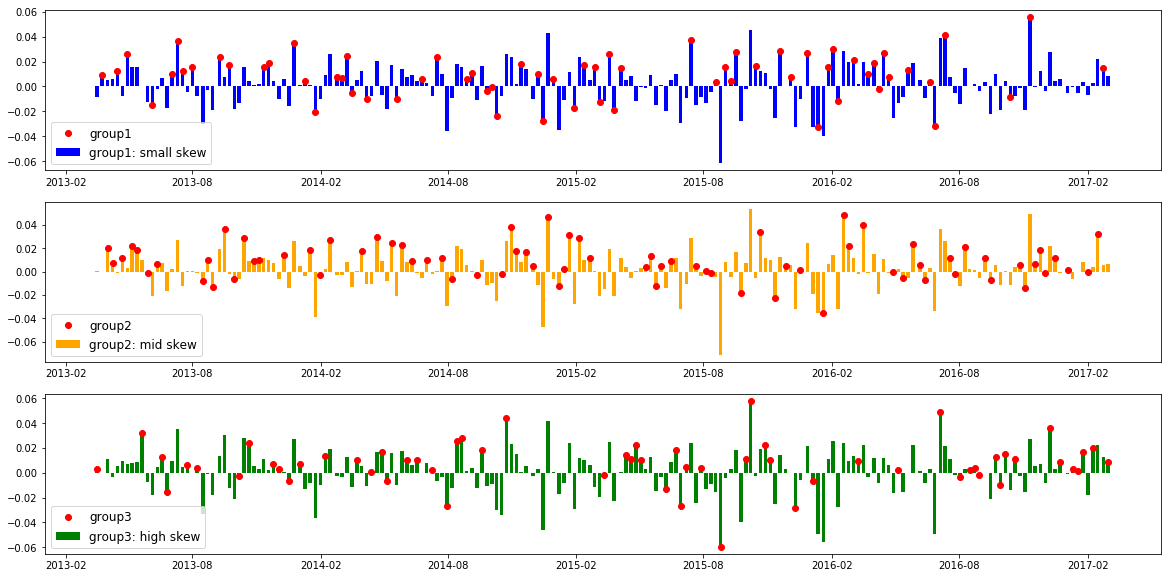

('group1 win rate: ', 0.325, '\n', 'group2 win rate: ', 0.375, '\n', 'group3 win rate: ', 0.3)


In [126]:
skew_max = return_by_group_skew.idxmax(axis = 1)
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.bar(return_by_group_skew.group1.index, return_by_group_skew.group1, label = 'group1: small skew', width = 5, color = 'blue')
plt.plot(return_by_group_skew.group1[skew_max[skew_max == 'group1'].index], 'ro')
plt.legend(loc = 'lower left',prop={'size':12})
plt.subplot(312)
plt.bar(return_by_group_skew.group2.index, return_by_group_skew.group2, label = 'group2: mid skew', width = 5, color = 'orange')
plt.plot(return_by_group_skew.group2[skew_max[skew_max == 'group2'].index], 'ro')
plt.legend(loc = 'lower left',prop={'size':12})
plt.subplot(313)
plt.bar(return_by_group_skew.group3.index, return_by_group_skew.group3, label = 'group3: high skew', width = 5, color = 'green')
plt.plot(return_by_group_skew.group3[skew_max[skew_max == 'group3'].index], 'ro')
#plt.bar(range(len(DJIA_weekly[:-50])), DJIA_weekly[:-50], alpha = 0.5, label = 'DJIA', lw = 4)
plt.legend(loc = 'lower left',prop={'size':12})
plt.show()
print ('group1 win rate: ', len(skew_max[skew_max == 'group1'])/float(len(skew_max)),'\n',\
       'group2 win rate: ', len(skew_max[skew_max == 'group2'])/float(len(skew_max)), '\n',\
       'group3 win rate: ', len(skew_max[skew_max == 'group3'])/float(len(skew_max)))

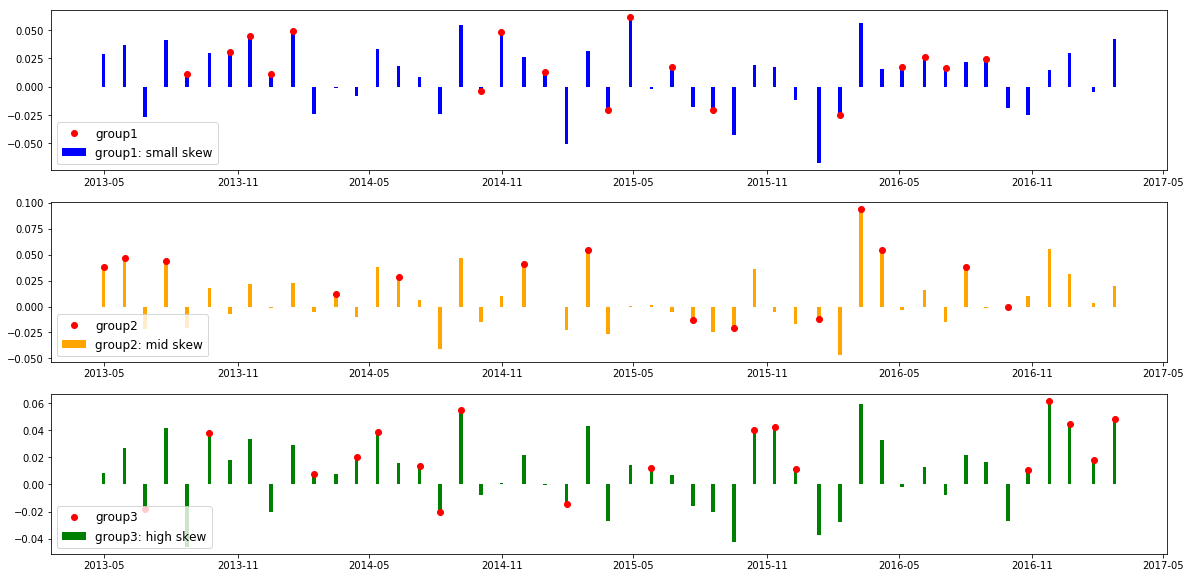

('group1 win rate: ', 0.3469387755102041, '\n', 'group2 win rate: ', 0.2857142857142857, '\n', 'group3 win rate: ', 0.3673469387755102)


In [127]:
skew_max = return_by_group_skew_monthly.idxmax(axis = 1)
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.bar(return_by_group_skew_monthly.group1.index, return_by_group_skew_monthly.group1, label = 'group1: small skew', width = 5, color = 'blue')
plt.plot(return_by_group_skew_monthly.group1[skew_max[skew_max == 'group1'].index], 'ro')
plt.legend(loc = 'lower left',prop={'size':12})
plt.subplot(312)
plt.bar(return_by_group_skew_monthly.group2.index, return_by_group_skew_monthly.group2, label = 'group2: mid skew', width = 5, color = 'orange')
plt.plot(return_by_group_skew_monthly.group2[skew_max[skew_max == 'group2'].index], 'ro')
plt.legend(loc = 'lower left',prop={'size':12})
plt.subplot(313)
plt.bar(return_by_group_skew_monthly.group3.index, return_by_group_skew_monthly.group3, label = 'group3: high skew', width = 5, color = 'green')
plt.plot(return_by_group_skew_monthly.group3[skew_max[skew_max == 'group3'].index], 'ro')
#plt.bar(range(len(DJIA_weekly[:-50])), DJIA_weekly[:-50], alpha = 0.5, label = 'DJIA', lw = 4)
plt.legend(loc = 'lower left',prop={'size':12})
plt.show()
print ('group1 win rate: ', len(skew_max[skew_max == 'group1'])/float(len(skew_max)),'\n',\
       'group2 win rate: ', len(skew_max[skew_max == 'group2'])/float(len(skew_max)), '\n',\
       'group3 win rate: ', len(skew_max[skew_max == 'group3'])/float(len(skew_max)))

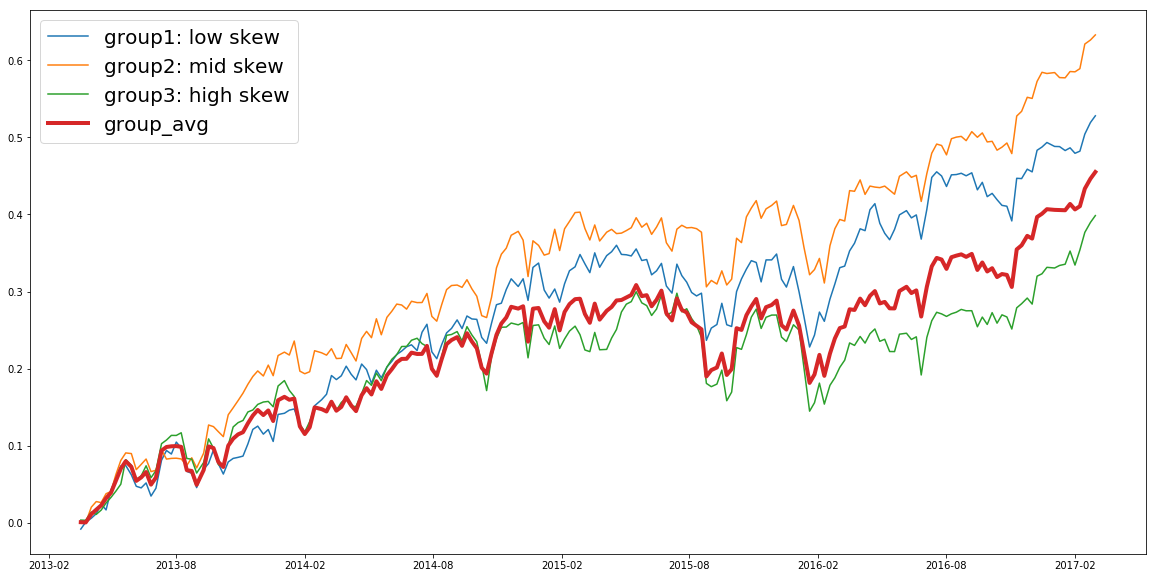

In [115]:
plt.figure(figsize = (20,10))
plt.plot(return_by_group_skew.group1.index, return_by_group_skew.group1.cumsum(), label = 'group1: low skew')
plt.plot(return_by_group_skew.group2.index, return_by_group_skew.group2.cumsum(), label = 'group2: mid skew')
plt.plot(return_by_group_skew.group3.index, return_by_group_skew.group3.cumsum(), label = 'group3: high skew')
plt.plot(return_by_group_skew.median(axis = 1).cumsum(), label = 'group_avg', lw = 4)
plt.legend(loc = 'upper left',prop={'size': 20})

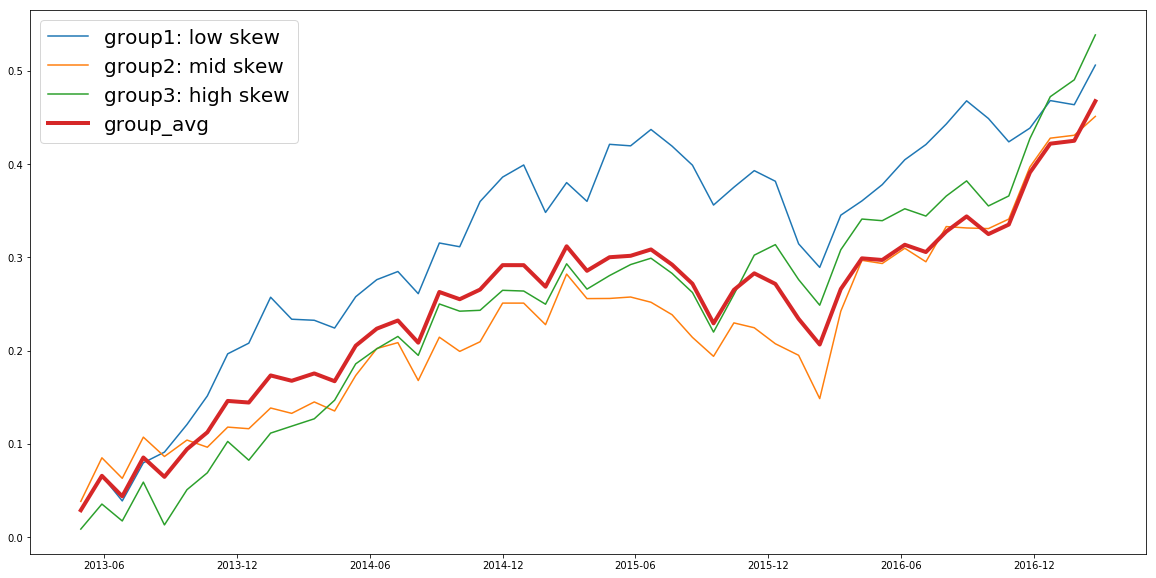

In [116]:
plt.figure(figsize = (20,10))
plt.plot(return_by_group_skew_monthly.group1.index, return_by_group_skew_monthly.group1.cumsum(), label = 'group1: low skew')
plt.plot(return_by_group_skew_monthly.group2.index, return_by_group_skew_monthly.group2.cumsum(), label = 'group2: mid skew')
plt.plot(return_by_group_skew_monthly.group3.index, return_by_group_skew_monthly.group3.cumsum(), label = 'group3: high skew')
plt.plot(return_by_group_skew_monthly.median(axis = 1).cumsum(), label = 'group_avg', lw = 4)
plt.legend(loc = 'upper left',prop={'size': 20})

In [117]:
# return_by_group_kurt
group_name = ['group1', 'group2', 'group3']
n_stock_grp = int(30/len(group_name))
return_by_group_kurt = pd.DataFrame(columns = group_name)
tmp_list = []
for week in range(total_week-1):
    kurt_this_week = sorted([(com, weekly_data[com].RKurt[week]) for com in weekly_data.keys()], key = lambda x: x[1])
    #print (vol_this_week)
    group_return_list = []
    for i in range(len(group_name)):
        cur_group, _ = zip(*kurt_this_week[n_stock_grp*i : n_stock_grp*i+n_stock_grp])
        r_ = []
        for com in cur_group:
            r_.append(weekly_data[com].WR[week+1])
        group_return_list.append(np.mean(r_))
    tmp_list.append(dict(zip(group_name, group_return_list)))
return_by_group_kurt = return_by_group_kurt.append(tmp_list)
return_by_group_kurt.index = weekly_data['AAPL'].index[1:]

In [118]:
# return_by_group_kurt_monthly
group_name = ['group1', 'group2', 'group3']
n_stock_grp = int(30/len(group_name))
return_by_group_kurt_monthly = pd.DataFrame(columns = group_name)
tmp_list = []
for month in range(total_month-1):
    kurt_this_month = sorted([(com, monthly_data[com].RKurt[month]) for com in monthly_data.keys()], key = lambda x: x[1])
    #print (vol_this_month)
    group_return_list = []
    for i in range(len(group_name)):
        cur_group, _ = zip(*kurt_this_month[n_stock_grp*i : n_stock_grp*i+n_stock_grp])
        r_ = []
        for com in cur_group:
            r_.append(monthly_data[com].MR[month+1])
        group_return_list.append(np.mean(r_))
    tmp_list.append(dict(zip(group_name, group_return_list)))
return_by_group_kurt_monthly = return_by_group_kurt_monthly.append(tmp_list)
return_by_group_kurt_monthly.index = monthly_data['AAPL'].index[1:]

In [119]:
return_by_group_kurt.sum()

group1    0.497067
group2    0.591863
group3    0.470825
dtype: float64

In [120]:
return_by_group_kurt_monthly.sum()

group1    0.428619
group2    0.476199
group3    0.590887
dtype: float64

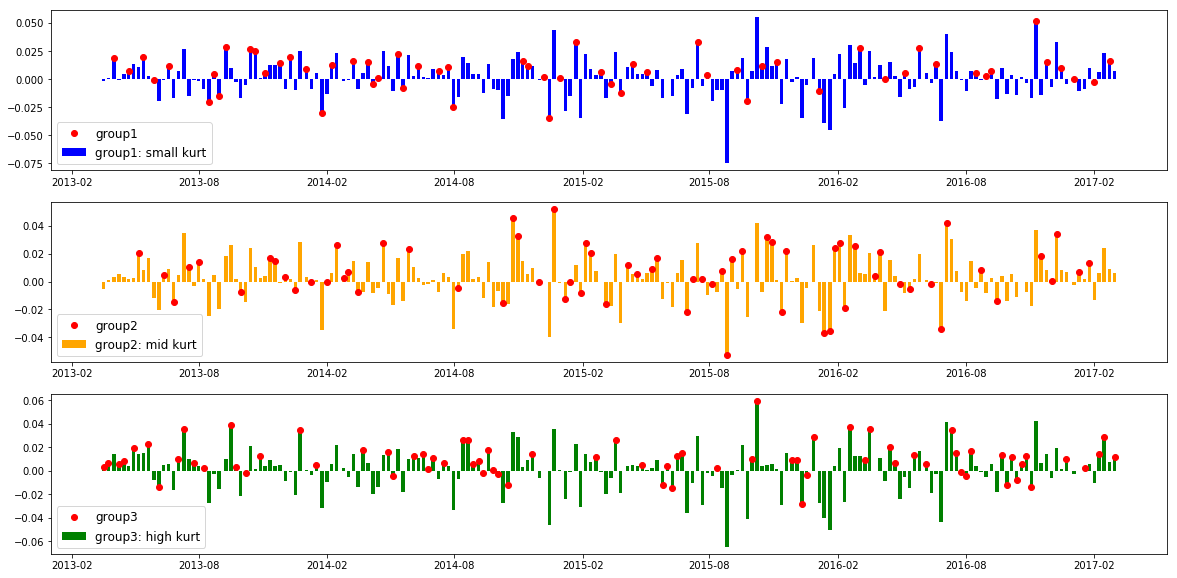

('group1 win rate: ', 0.295, '\n', 'group2 win rate: ', 0.33, '\n', 'group3 win rate: ', 0.375)


In [128]:
kurt_max = return_by_group_kurt.idxmax(axis = 1)
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.bar(return_by_group_kurt.group1.index, return_by_group_kurt.group1, label = 'group1: small kurt', width = 5, color = 'blue')
plt.plot(return_by_group_kurt.group1[kurt_max[kurt_max == 'group1'].index], 'ro')
plt.legend(loc = 'lower left',prop={'size':12})
plt.subplot(312)
plt.bar(return_by_group_kurt.group2.index, return_by_group_kurt.group2, label = 'group2: mid kurt', width = 5, color = 'orange')
plt.plot(return_by_group_kurt.group2[kurt_max[kurt_max == 'group2'].index], 'ro')
plt.legend(loc = 'lower left',prop={'size':12})
plt.subplot(313)
plt.bar(return_by_group_kurt.group3.index, return_by_group_kurt.group3, label = 'group3: high kurt', width = 5, color = 'green')
plt.plot(return_by_group_kurt.group3[kurt_max[kurt_max == 'group3'].index], 'ro')
#plt.bar(range(len(DJIA_weekly[:-50])), DJIA_weekly[:-50], alpha = 0.5, label = 'DJIA', lw = 4)
plt.legend(loc = 'lower left',prop={'size':12})
plt.show()
print ('group1 win rate: ', len(kurt_max[kurt_max == 'group1'])/float(len(kurt_max)),'\n',\
       'group2 win rate: ', len(kurt_max[kurt_max == 'group2'])/float(len(kurt_max)), '\n',\
       'group3 win rate: ', len(kurt_max[kurt_max == 'group3'])/float(len(kurt_max)))

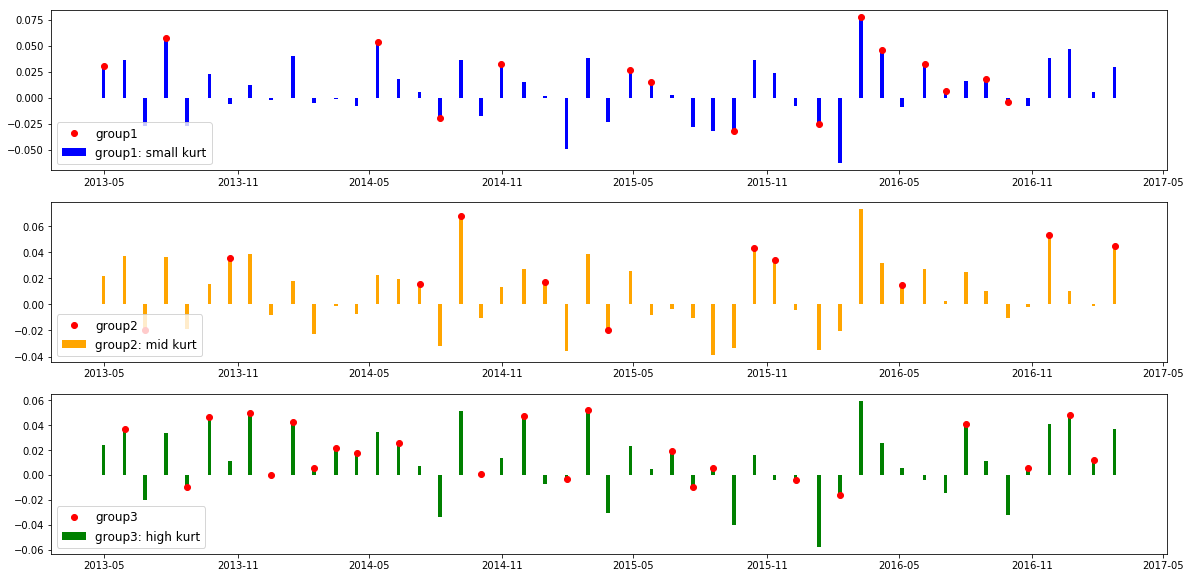

('group1 win rate: ', 0.30612244897959184, '\n', 'group2 win rate: ', 0.22448979591836735, '\n', 'group3 win rate: ', 0.46938775510204084)


In [130]:
kurt_max = return_by_group_kurt_monthly.idxmax(axis = 1)
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.bar(return_by_group_kurt_monthly.group1.index, return_by_group_kurt_monthly.group1, label = 'group1: small kurt', width = 5, color = 'blue')
plt.plot(return_by_group_kurt_monthly.group1[kurt_max[kurt_max == 'group1'].index], 'ro')
plt.legend(loc = 'lower left',prop={'size':12})
plt.subplot(312)
plt.bar(return_by_group_kurt_monthly.group2.index, return_by_group_kurt_monthly.group2, label = 'group2: mid kurt', width = 5, color = 'orange')
plt.plot(return_by_group_kurt_monthly.group2[kurt_max[kurt_max == 'group2'].index], 'ro')
plt.legend(loc = 'lower left',prop={'size':12})
plt.subplot(313)
plt.bar(return_by_group_kurt_monthly.group3.index, return_by_group_kurt_monthly.group3, label = 'group3: high kurt', width = 5, color = 'green')
plt.plot(return_by_group_kurt_monthly.group3[kurt_max[kurt_max == 'group3'].index], 'ro')
#plt.bar(range(len(DJIA_weekly[:-50])), DJIA_weekly[:-50], alpha = 0.5, label = 'DJIA', lw = 4)
plt.legend(loc = 'lower left',prop={'size':12})
plt.show()
print ('group1 win rate: ', len(kurt_max[kurt_max == 'group1'])/float(len(kurt_max)),'\n',\
       'group2 win rate: ', len(kurt_max[kurt_max == 'group2'])/float(len(kurt_max)), '\n',\
       'group3 win rate: ', len(kurt_max[kurt_max == 'group3'])/float(len(kurt_max)))

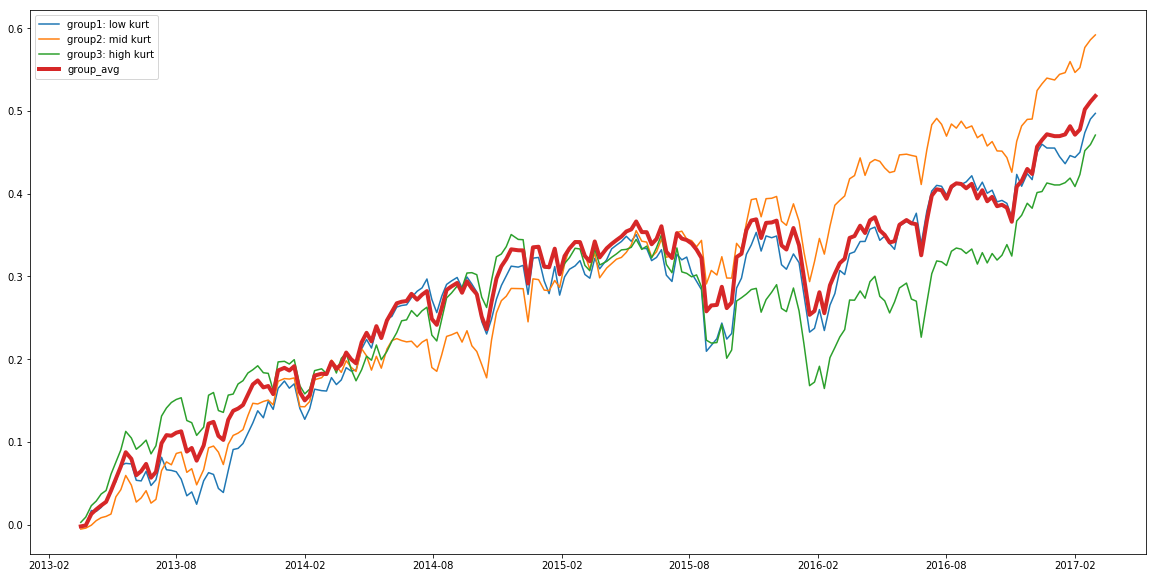

In [123]:
plt.figure(figsize=(20,10))
plt.plot(return_by_group_kurt.group1.cumsum(), label = 'group1: low kurt')
plt.plot(return_by_group_kurt.group2.cumsum(), label = 'group2: mid kurt')
plt.plot(return_by_group_kurt.group3.cumsum(), label = 'group3: high kurt')
#plt.plot(range(len(DJIA_weekly[:-50])), DJIA_weekly[:-50].cumsum(), label = 'DJIA', lw = 4)
#return_by_group_kurt['market'] = (return_by_group_kurt.group1 + return_by_group_kurt.group2 + return_by_group_kurt.group3)/3
plt.plot(return_by_group_kurt.median(axis = 1).cumsum(), label = 'group_avg', lw = 4)
plt.legend(loc = 'upper left')

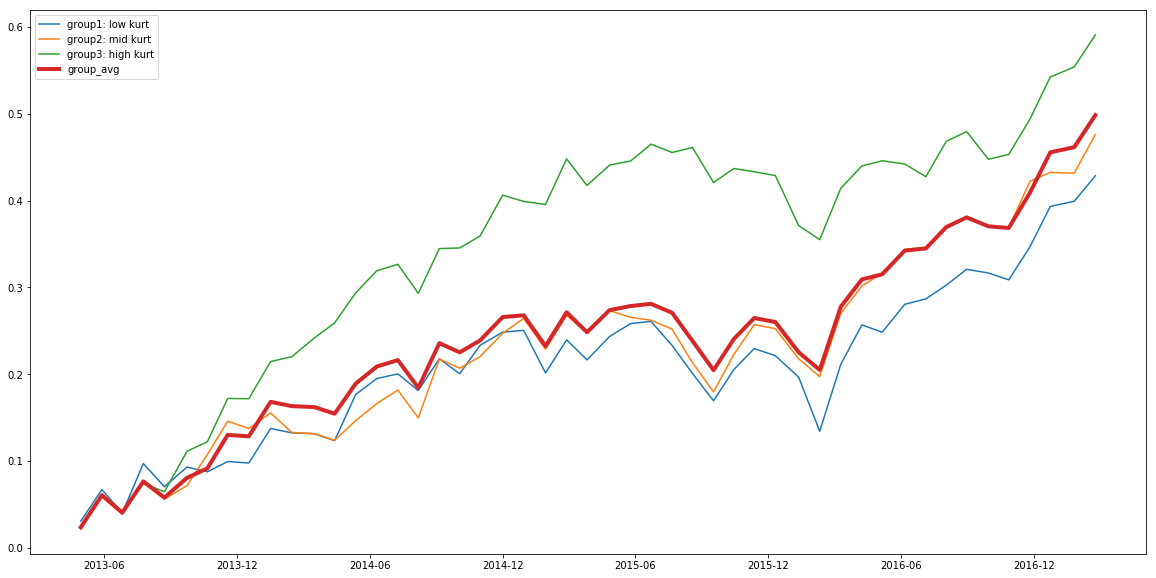

In [124]:
plt.figure(figsize=(20,10))
plt.plot(return_by_group_kurt_monthly.group1.cumsum(), label = 'group1: low kurt')
plt.plot(return_by_group_kurt_monthly.group2.cumsum(), label = 'group2: mid kurt')
plt.plot(return_by_group_kurt_monthly.group3.cumsum(), label = 'group3: high kurt')
#plt.plot(range(len(DJIA_weekly[:-50])), DJIA_weekly[:-50].cumsum(), label = 'DJIA', lw = 4)
#return_by_group_kurt_monthly['market'] = (return_by_group_kurt_monthly.group1 + return_by_group_kurt_monthly.group2 + return_by_group_kurt_monthly.group3)/3
plt.plot(return_by_group_kurt_monthly.median(axis = 1).cumsum(), label = 'group_avg', lw = 4)
plt.legend(loc = 'upper left')